In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#from sklearn.externals import joblib
import joblib
import seaborn as sns
# sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
#from tensorflow import set_random_seed
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)


from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers


import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers


from pandas.plotting import autocorrelation_plot as auto_corr

In [2]:
# set random seed
seed(10)
tf.random.set_seed(10)

In [3]:
ls

 anomaly-detection.ipynb
 Credit_anomaly.ipynb
 creditcard.csv
'Data Description.txt'
 Final_Pre-processing_Again_Again-Copy1.ipynb
 Final_Pre-processing_Again_Again.ipynb
 Final_Pre-processing_Again_Returns.ipynb
 Final_Pre-processing.ipynb
 Final_Pre-processing_Returns.ipynb
'Isolation Forest.ipynb'
'KNN_Store & Dpt.ipynb'
'LSTM Auto Encoder-Another.ipynb'
'LSTM Auto Encoder.ipynb'
'ML_Project_Data Cleaning and Preproscessing.ipynb'
 ML_project_DBSCAN.ipynb
 store1.h5
 store-data/
 Store_Dept_wise_ARIMA.ipynb
 Store_Dept_wise_DBSCAN.ipynb
 store-marked-data/
 store-reindexed-data/
 Store_wise_DBSCAN_better.ipynb
 Store_wise_DBSCAN.ipynb
 Store_wise_SVM.ipynb
 Walmart_1.csv
 Walmart_1_reindexed.csv
 walmart_2.csv
 walmart_2_x.csv
 walmart_2_x_reindexed.csv
 walmart.csv
 walmart_final.csv
 walmart_final_marked.csv
 walmart_final_reindexed.csv
 Walmart_marked_1.csv
 Whole_train.h5


# Read Data

In [4]:
data = pd.read_csv("walmart_final.csv")
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index("Date")
data

,Store,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Total_Markdown,1.0,...,93.0,94.0,95.0,96.0,97.0,98.0,99.0,Type_1,Type_2,Type_3
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0.122377,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,1,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,1,0,0.057628,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,1,0,0.064927,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,1,0,0.000184,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,1,0,0.005329,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,45,0,0.108989,0.590431,0.865399,0.654796,0.458884,0.451136,0.062609,0,...,0,0,0,0,0,0,0,0,1,0
2012-10-26,45,0,0.011048,0.590431,0.865399,0.654796,0.458884,0.451136,0.062609,0,...,0,0,0,0,0,0,0,0,1,0
2012-10-26,45,0,0.017160,0.590431,0.865399,0.654796,0.458884,0.451136,0.062609,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
stores_data = []
path = "store-data"
print("--------------- Starting Execution -------------")
for i in range(1, 46):
    store = pd.read_csv(f"{path}/Store_{i}.csv")
    store["Date"] = pd.to_datetime(store["Date"])
    store = store.set_index("Date")
    print(f"Read: Store_{i}.csv")
    stores_data.append(store)
print("---------------- End of Execution -------------") 

--------------- Starting Execution -------------
Read: Store_1.csv
Read: Store_2.csv
Read: Store_3.csv
Read: Store_4.csv
Read: Store_5.csv
Read: Store_6.csv
Read: Store_7.csv
Read: Store_8.csv
Read: Store_9.csv
Read: Store_10.csv
Read: Store_11.csv
Read: Store_12.csv
Read: Store_13.csv
Read: Store_14.csv
Read: Store_15.csv
Read: Store_16.csv
Read: Store_17.csv
Read: Store_18.csv
Read: Store_19.csv
Read: Store_20.csv
Read: Store_21.csv
Read: Store_22.csv
Read: Store_23.csv
Read: Store_24.csv
Read: Store_25.csv
Read: Store_26.csv
Read: Store_27.csv
Read: Store_28.csv
Read: Store_29.csv
Read: Store_30.csv
Read: Store_31.csv
Read: Store_32.csv
Read: Store_33.csv
Read: Store_34.csv
Read: Store_35.csv
Read: Store_36.csv
Read: Store_37.csv
Read: Store_38.csv
Read: Store_39.csv
Read: Store_40.csv
Read: Store_41.csv
Read: Store_42.csv
Read: Store_43.csv
Read: Store_44.csv
Read: Store_45.csv
---------------- End of Execution -------------


In [6]:
stores_data[0]

,Store,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Total_Markdown,1.0,...,93.0,94.0,95.0,96.0,97.0,98.0,99.0,Type_1,Type_2,Type_3
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0.122377,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,1,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,1,0,0.057628,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,1,0,0.064927,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,1,0,0.000184,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,1,0,0.005329,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,1,0,0.189092,0.600178,0.712132,0.962552,0.258194,0.630267,0.065301,0,...,0,0,0,0,0,0,0,0,0,1
2012-10-26,1,0,0.327111,0.600178,0.712132,0.962552,0.258194,0.630267,0.065301,0,...,1,0,0,0,0,0,0,0,0,1
2012-10-26,1,0,0.016404,0.600178,0.712132,0.962552,0.258194,0.630267,0.065301,0,...,0,0,0,0,0,0,0,0,0,1


In [149]:
X = data.copy()
X

,Store,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Total_Markdown,1.0,...,93.0,94.0,95.0,96.0,97.0,98.0,99.0,Type_1,Type_2,Type_3
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0.122377,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,1,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,1,0,0.057628,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,1,0,0.064927,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,1,0,0.000184,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
2010-02-05,1,0,0.005329,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,45,0,0.108989,0.590431,0.865399,0.654796,0.458884,0.451136,0.062609,0,...,0,0,0,0,0,0,0,0,1,0
2012-10-26,45,0,0.011048,0.590431,0.865399,0.654796,0.458884,0.451136,0.062609,0,...,0,0,0,0,0,0,0,0,1,0
2012-10-26,45,0,0.017160,0.590431,0.865399,0.654796,0.458884,0.451136,0.062609,0,...,0,0,0,0,0,0,0,0,1,0


In [150]:
X = X.drop('Store', axis= 1)
X = X.to_numpy()

In [151]:
X

array([[0.        , 0.12237656, 0.12284444, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.05762794, 0.12284444, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.06492719, 0.12284444, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.01716025, 0.59043095, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.00298124, 0.59043095, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.00447228, 0.59043095, ..., 0.        , 1.        ,
        0.        ]])

# Base line LSTM

In [10]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [152]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X.reshape(X.shape[0], 1, X.shape[1])

In [12]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 92)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 16)             6976      
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 336       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 4)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 4)              144       
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 16)             1344      
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 92)             1564  

In [13]:
# fit the model to the data
nb_epochs = 40
batch_size = 16
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size, validation_split=0.05).history

Epoch 1/40
25031/25031 [==============================] - 54s 2ms/step - loss: 0.0137 - val_loss: 0.0135
Epoch 2/40
25031/25031 [==============================] - 52s 2ms/step - loss: 0.0125 - val_loss: 0.0131
Epoch 3/40
25031/25031 [==============================] - 52s 2ms/step - loss: 0.0121 - val_loss: 0.0130
Epoch 4/40
25031/25031 [==============================] - 52s 2ms/step - loss: 0.0120 - val_loss: 0.0130
Epoch 5/40
25031/25031 [==============================] - 52s 2ms/step - loss: 0.0120 - val_loss: 0.0129
Epoch 6/40
25031/25031 [==============================] - 52s 2ms/step - loss: 0.0120 - val_loss: 0.0128
Epoch 7/40
25031/25031 [==============================] - 52s 2ms/step - loss: 0.0120 - val_loss: 0.0128
Epoch 8/40
25031/25031 [==============================] - 52s 2ms/step - loss: 0.0119 - val_loss: 0.0128
Epoch 9/40
25031/25031 [==============================] - 52s 2ms/step - loss: 0.0119 - val_loss: 0.0127
Epoch 10/40
25031/25031 [==============================

In [194]:
# save all model information, including weights, in h5 format
model.save("Whole_train.h5")
print("Model saved")

Model saved


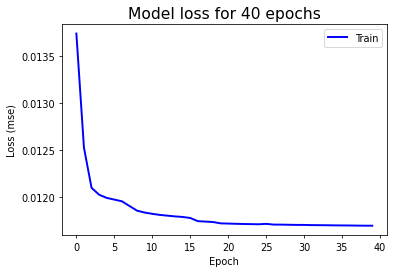

In [97]:
# plot the training losses
fig, ax = plt.subplots(dpi=70)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.set_title('Model loss for 40 epochs', fontsize=16)
ax.set_ylabel('Loss (mse)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

## Distribution of Loss Function

By plotting the distribution of the calculated loss in the training set, one can use this to identify a suitable threshold value for identifying an anomaly. In doing this, one can make sure that this threshold is set above the “noise level” and that any flagged anomalies should be statistically significant above the background noise.

In [153]:
def mad(x):
    md = 1.4826*np.median(np.abs(x - np.median(x)))
    tmax = np.median(x) + 13*md
    return tmax

/home/sysadm/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


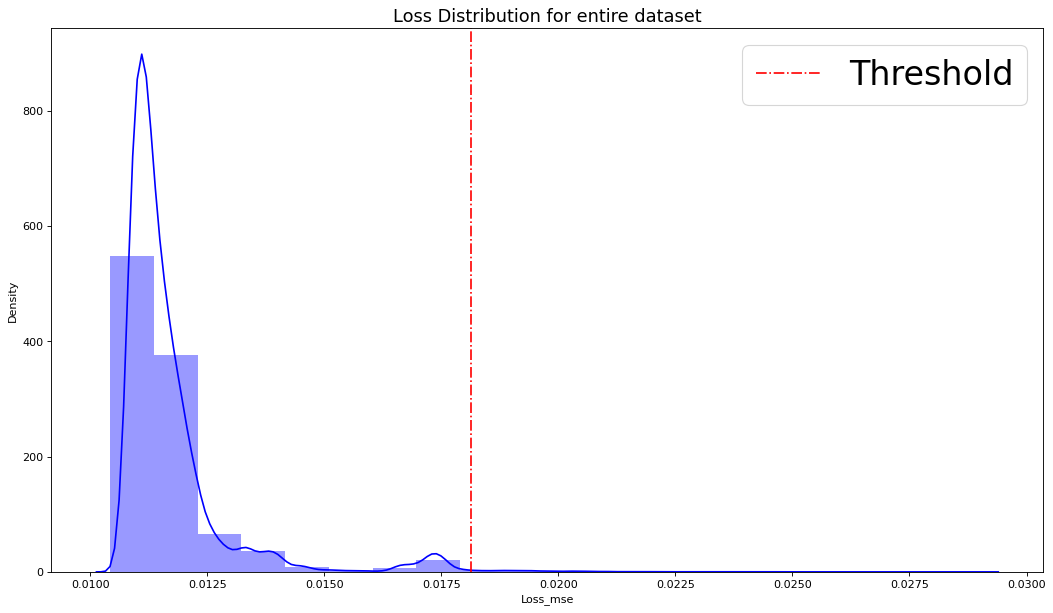

In [163]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=data.drop('Store', axis= 1).columns)
X_pred.index = data.index

scored = pd.DataFrame(index=data.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mse'] = np.mean(np.square(X_pred-Xtrain), axis = 1)
threshold = mad(scored["Loss_mse"])
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution for entire dataset', fontsize=16)
sns.distplot(scored['Loss_mse'], bins = 20, kde= True, color = 'blue')
plt.axvline(x = threshold, linestyle = "dashdot", label = "Threshold", color = "red")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles = handles, prop={'size': 30})
# plt.xlim([0.0,.02])
plt.savefig("loss_dist_global.png")

Text(0.5, 0, 'Loss')

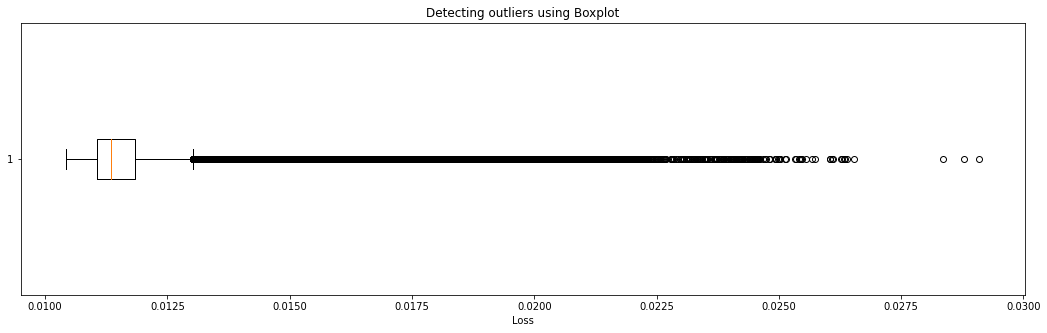

In [99]:
plt.figure(figsize=(18,5))
plt.boxplot(scored['Loss_mse'], vert=False)
plt.title("Detecting outliers using Boxplot")

plt.xlabel('Loss')

In [155]:
mad(scored['Loss_mse'])

0.018127415080404937

In [101]:
scored
threshold = mad(scored['Loss_mse'])
scored['Anomaly'] = scored['Loss_mse'] > threshold
scored

,Loss_mse,Anomaly
Date,,
2010-02-05,0.011002,False
2010-02-05,0.011348,False
2010-02-05,0.010996,False
2010-02-05,0.011519,False
2010-02-05,0.011232,False
...,...,...
2012-10-26,0.011913,False
2012-10-26,0.011821,False
2012-10-26,0.011515,False


In [102]:
total_anomal_data = data[scored["Anomaly"]]
total_anomal_data

,Store,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Total_Markdown,1.0,...,93.0,94.0,95.0,96.0,97.0,98.0,99.0,Type_1,Type_2,Type_3
Date,,,,,,,,,,,,,,,,,,,,,
2010-11-26,1,1,0.966318,0.517689,0.158650,0.846945,0.379433,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
2010-12-24,1,0,0.890538,0.300978,0.267050,0.843552,0.379433,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
2011-11-25,1,1,0.915775,0.439822,0.518306,0.913361,0.382116,0.630267,0.744937,0,...,0,0,0,0,0,0,0,0,0,1
2011-11-25,1,1,1.000000,0.439822,0.518306,0.913361,0.382116,0.630267,0.744937,0,...,0,0,0,0,0,0,0,0,0,1
2011-12-23,1,0,0.956641,0.223289,0.429289,0.922159,0.382116,0.630267,0.080744,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-07-23,45,0,0.009147,0.974041,0.052670,0.556367,0.466168,0.451136,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
2010-07-23,45,0,0.011958,0.974041,0.052670,0.556367,0.466168,0.451136,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
2010-07-23,45,0,0.194263,0.974041,0.052670,0.556367,0.466168,0.451136,0.000000,0,...,0,0,0,0,0,0,0,0,1,0


In [103]:
total_anomalies=scored[scored['Anomaly'] == True]
total_anomalies.Loss_mse.describe()

count    2365.000000
mean        0.019843
std         0.001583
min         0.018129
25%         0.018760
50%         0.019364
75%         0.020426
max         0.029098
Name: Loss_mse, dtype: float64

In [104]:
# # calculate the loss on the test set
# X_pred = model.predict(X_train)
# X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
# X_pred = pd.DataFrame(X_pred, columns=data.drop('Store', axis= 1).columns)
# X_pred.index = data.index

# scored = pd.DataFrame(index=data.index)
# Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
# scored['Loss_mse'] = np.mean(np.square(X_pred-Xtest), axis = 1)
# threshold = ninetinineth_percentile
# scored['Anomaly'] = scored['Loss_mse'] > threshold
# scored

<AxesSubplot:>

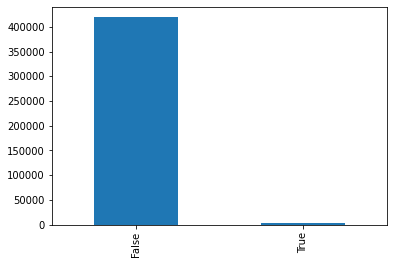

In [105]:
scored['Anomaly'].value_counts().plot.bar()

In [106]:
# Persentage of anomalies in the data set 
p = len(total_anomalies)/len(scored) * 100
print('Percentage of anomalies in our data is = ',p,'%')

Percentage of anomalies in our data is =  0.5609981734943189 %


No. of anomalies for store no.1 is 164
The threshold for store 1 is 0.014349187075794145
Amount of anomaly is 1.6009371339320577 %


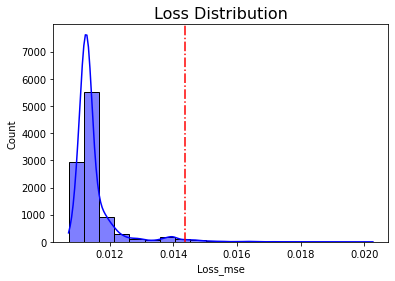

No. of anomalies for store no.2 is 70
The threshold for store 2 is 0.01373248659845663
Amount of anomaly is 0.6837272904864231 %


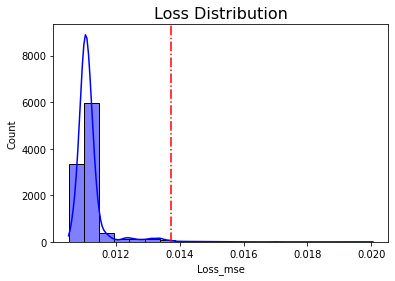

No. of anomalies for store no.3 is 145
The threshold for store 3 is 0.013810664096288276
Amount of anomaly is 1.6046923417441346 %


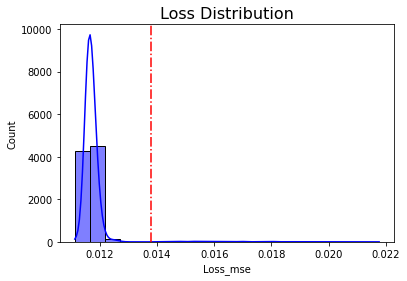

No. of anomalies for store no.4 is 2
The threshold for store 4 is 0.018086321566759562
Amount of anomaly is 0.019470404984423675 %


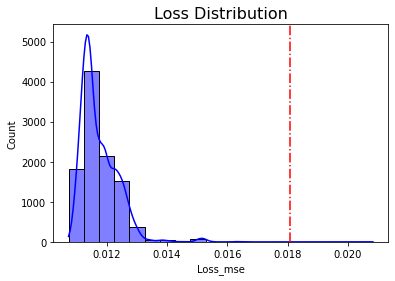

No. of anomalies for store no.5 is 107
The threshold for store 5 is 0.014300072446776453
Amount of anomaly is 1.1890210023335928 %


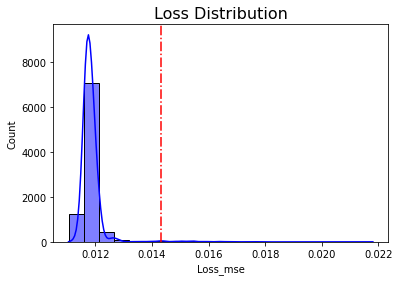

No. of anomalies for store no.6 is 71
The threshold for store 6 is 0.013797669906613878
Amount of anomaly is 0.6953285672314171 %


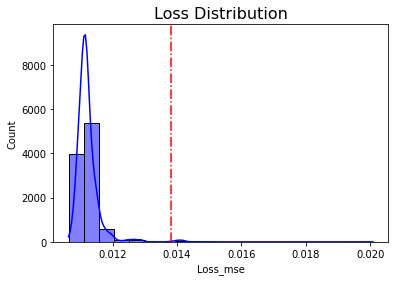

No. of anomalies for store no.7 is 2
The threshold for store 7 is 0.014026562401878571
Amount of anomaly is 0.02048760499897562 %


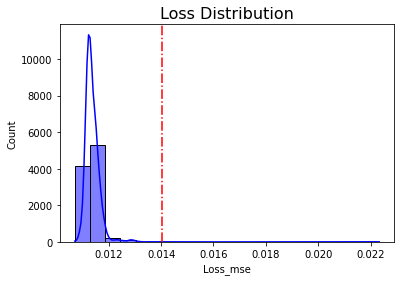

No. of anomalies for store no.8 is 103
The threshold for store 8 is 0.014578330680964962
Amount of anomaly is 1.0409297625063163 %


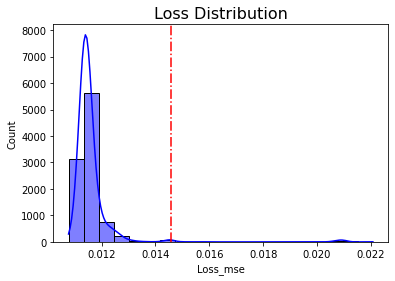

No. of anomalies for store no.9 is 91
The threshold for store 9 is 0.014311605063902472
Amount of anomaly is 1.0262772076237734 %


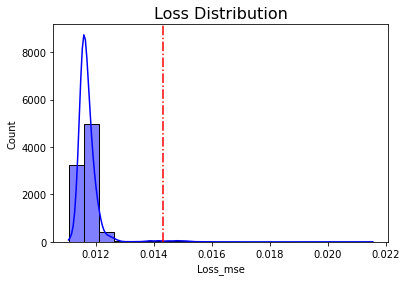

No. of anomalies for store no.10 is 9
The threshold for store 10 is 0.012844991153185971
Amount of anomaly is 0.08725157537566651 %


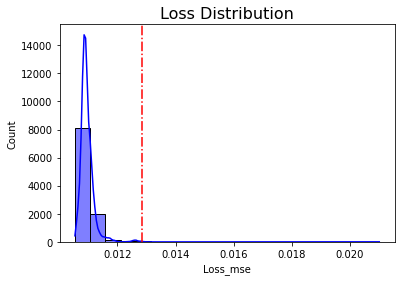

No. of anomalies for store no.11 is 22
The threshold for store 11 is 0.013871086505366675
Amount of anomaly is 0.21864440469091634 %


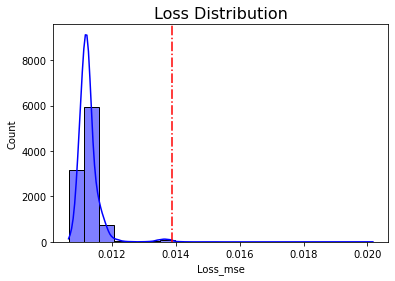

No. of anomalies for store no.12 is 2
The threshold for store 12 is 0.020473631842709422
Amount of anomaly is 0.020607934054611025 %


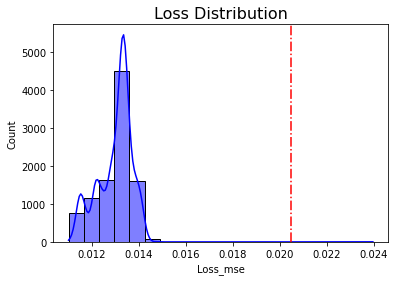

No. of anomalies for store no.13 is 63
The threshold for store 13 is 0.014422163216186546
Amount of anomaly is 0.601489402329578 %


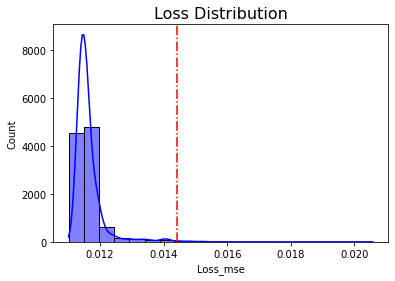

No. of anomalies for store no.14 is 3
The threshold for store 14 is 0.01561421201062935
Amount of anomaly is 0.0298804780876494 %


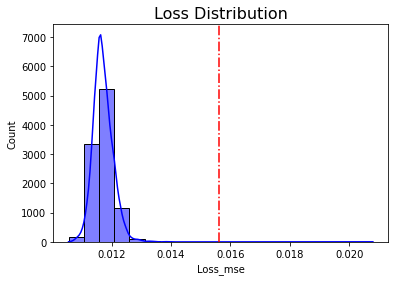

No. of anomalies for store no.15 is 3
The threshold for store 15 is 0.01263607636708438
Amount of anomaly is 0.0302999697000303 %


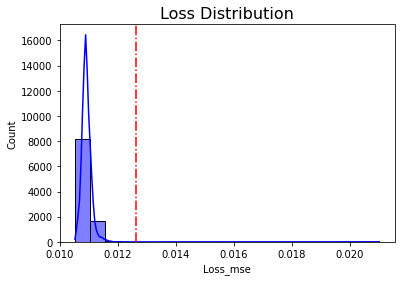

No. of anomalies for store no.16 is 24
The threshold for store 16 is 0.01361640596047418
Amount of anomaly is 0.2541565180557026 %


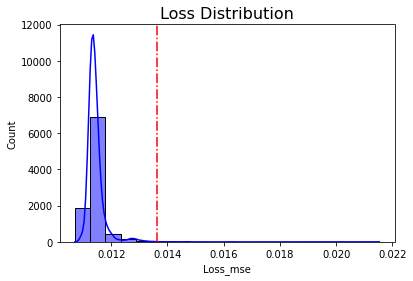

No. of anomalies for store no.17 is 3
The threshold for store 17 is 0.014665325141271963
Amount of anomaly is 0.030413625304136254 %


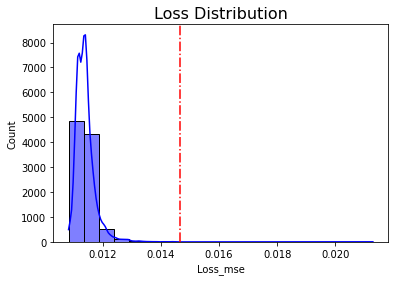

No. of anomalies for store no.18 is 50
The threshold for store 18 is 0.013102884738552709
Amount of anomaly is 0.5071508266558474 %


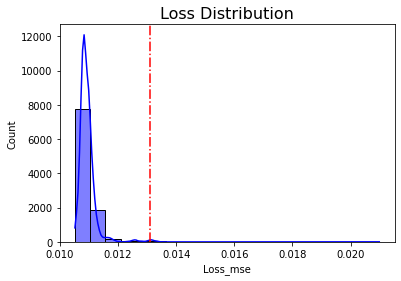

No. of anomalies for store no.19 is 5
The threshold for store 19 is 0.013029645092507237
Amount of anomaly is 0.049270792274339774 %


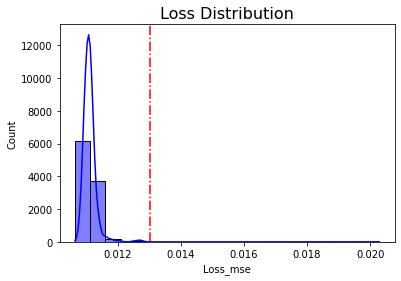

No. of anomalies for store no.20 is 8
The threshold for store 20 is 0.01343038602980232
Amount of anomaly is 0.07832386919913843 %


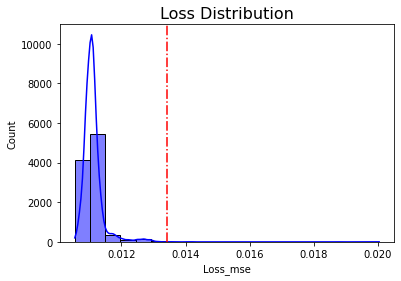

No. of anomalies for store no.21 is 4
The threshold for store 21 is 0.014777847161541038
Amount of anomaly is 0.04174493842621582 %


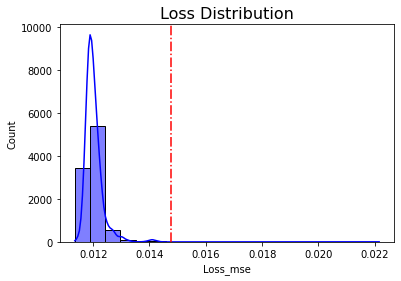

No. of anomalies for store no.22 is 4
The threshold for store 22 is 0.012518304833345845
Amount of anomaly is 0.041288191577208914 %


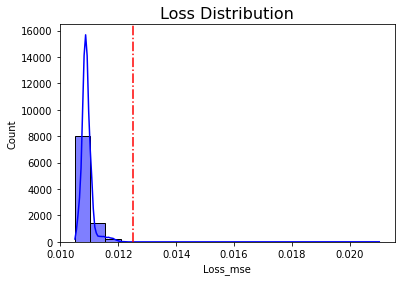

No. of anomalies for store no.23 is 3
The threshold for store 23 is 0.015473587582528252
Amount of anomaly is 0.029850746268656716 %


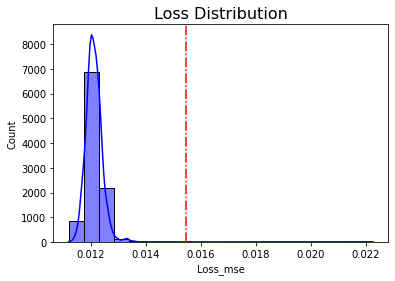

No. of anomalies for store no.24 is 60
The threshold for store 24 is 0.013365936066205647
Amount of anomaly is 0.5866249511145875 %


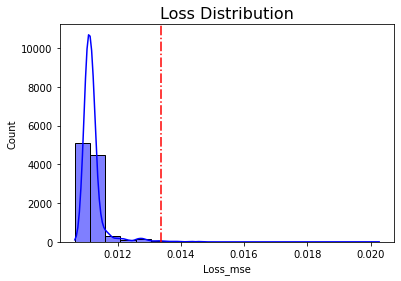

No. of anomalies for store no.25 is 3
The threshold for store 25 is 0.014077993414968633
Amount of anomaly is 0.03059975520195838 %


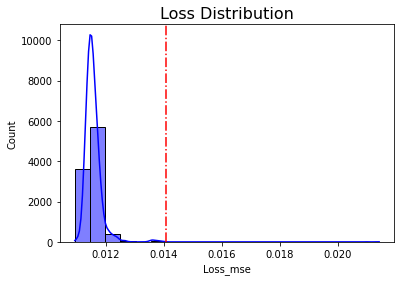

No. of anomalies for store no.26 is 120
The threshold for store 26 is 0.013410957027745569
Amount of anomaly is 1.217779581895677 %


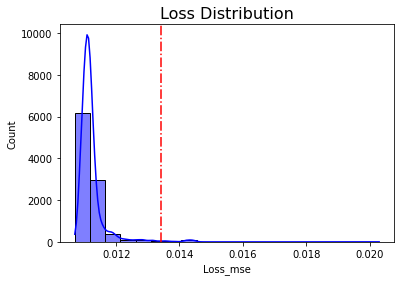

No. of anomalies for store no.27 is 7
The threshold for store 27 is 0.013103436736712114
Amount of anomaly is 0.0684596577017115 %


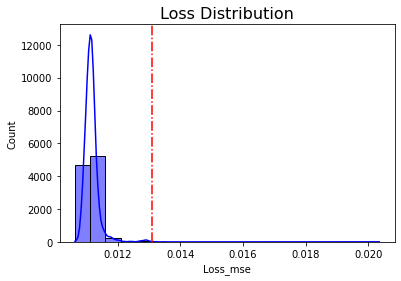

No. of anomalies for store no.28 is 2
The threshold for store 28 is 0.021659520908715334
Amount of anomaly is 0.019776525264511027 %


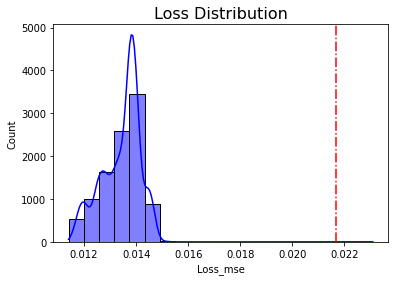

No. of anomalies for store no.29 is 68
The threshold for store 29 is 0.014039767694695619
Amount of anomaly is 0.7191961924907456 %


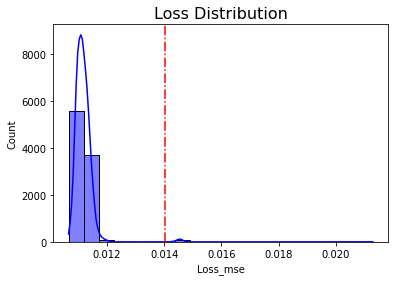

No. of anomalies for store no.30 is 123
The threshold for store 30 is 0.014893563926231148
Amount of anomaly is 1.718837339295696 %


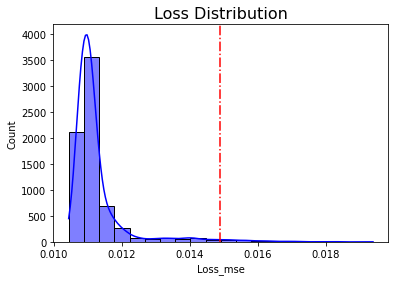

No. of anomalies for store no.31 is 16
The threshold for store 31 is 0.013575171768740705
Amount of anomaly is 0.1577598106882272 %


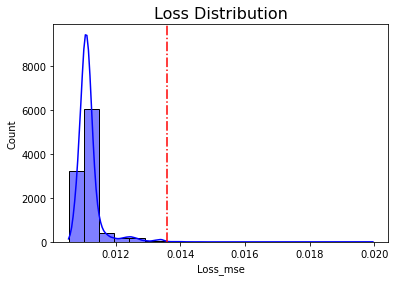

No. of anomalies for store no.32 is 4
The threshold for store 32 is 0.014777169168249851
Amount of anomaly is 0.03920799843168006 %


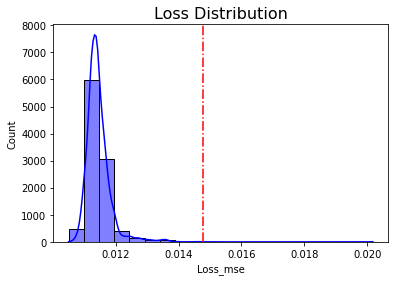

No. of anomalies for store no.33 is 28
The threshold for store 33 is 0.023441220601499335
Amount of anomaly is 0.43163249576075224 %


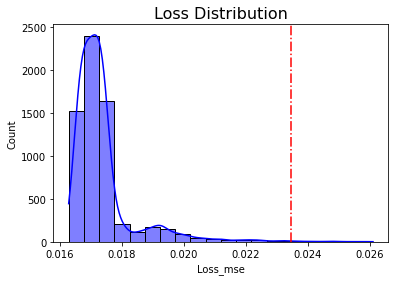

No. of anomalies for store no.34 is 2
The threshold for store 34 is 0.018377417501150663
Amount of anomaly is 0.019561815336463225 %


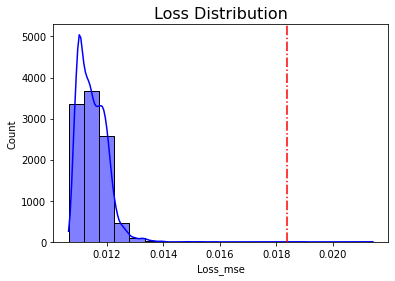

No. of anomalies for store no.35 is 70
The threshold for store 35 is 0.01275095602850965
Amount of anomaly is 0.7346767422334173 %


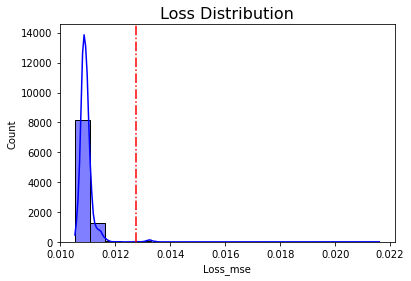

No. of anomalies for store no.36 is 76
The threshold for store 36 is 0.02132735231364946
Amount of anomaly is 1.2214721954355512 %


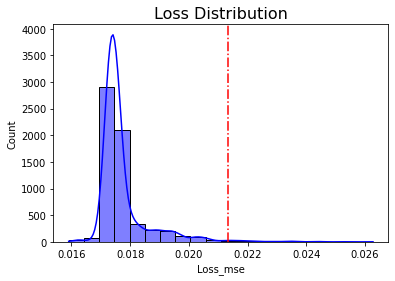

No. of anomalies for store no.37 is 48
The threshold for store 37 is 0.01514660188224151
Amount of anomaly is 0.6661115736885929 %


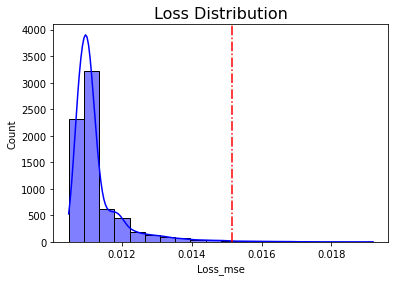

No. of anomalies for store no.38 is 5
The threshold for store 38 is 0.018250429839890715
Amount of anomaly is 0.06791632708503124 %


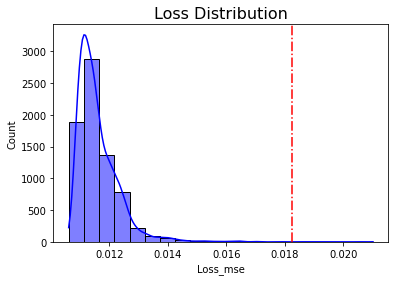

No. of anomalies for store no.39 is 276
The threshold for store 39 is 0.013640353418527394
Amount of anomaly is 2.794087872038874 %


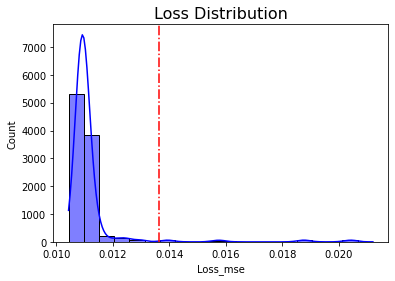

No. of anomalies for store no.40 is 78
The threshold for store 40 is 0.015607366328414063
Amount of anomaly is 0.7786762503743636 %


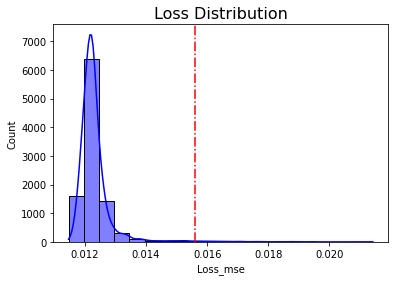

No. of anomalies for store no.41 is 78
The threshold for store 41 is 0.013809590539804578
Amount of anomaly is 0.7731958762886598 %


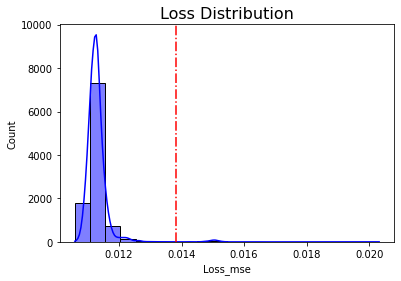

No. of anomalies for store no.42 is 18
The threshold for store 42 is 0.018765138472775066
Amount of anomaly is 0.2588810585358838 %


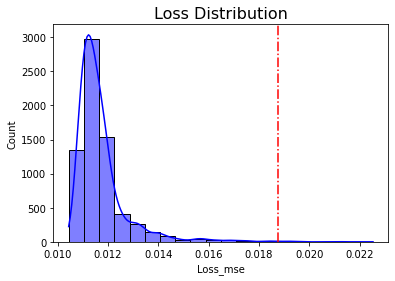

No. of anomalies for store no.43 is 4
The threshold for store 43 is 0.01884967354600882
Amount of anomaly is 0.059250481410161454 %


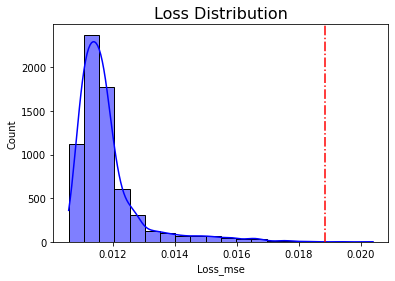

No. of anomalies for store no.44 is 82
The threshold for store 44 is 0.02329451632407097
Amount of anomaly is 1.1438136420700236 %


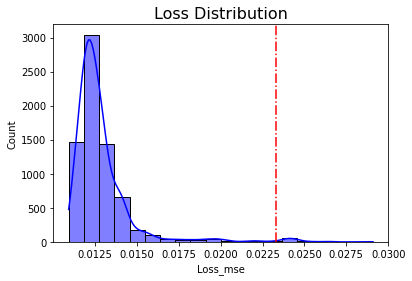

No. of anomalies for store no.45 is 113
The threshold for store 45 is 0.01699190269949544
Amount of anomaly is 1.172564075957248 %


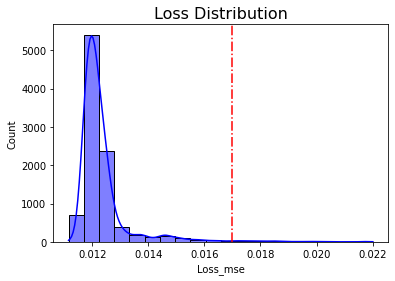

2239

In [107]:
scores = []
k = 0
total_anomaly_no = 0
test_all_anomaly = []
test_all_anomal_data = []
for store_data in stores_data:
    test_ = store_data.drop("Store", axis = 1)
    X_test_ = test_.to_numpy()
    X_test_ = X_test_.reshape(X_test_.shape[0], 1, X_test_.shape[1])
    # calculate the loss on the test set
    X_pred = model.predict(X_test_)
    X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
    X_pred = pd.DataFrame(X_pred, columns=test_.columns)
    X_pred.index = test_.index

    scored = pd.DataFrame(index=test_.index)
    Xtest = X_test_.reshape(X_test_.shape[0], X_test_.shape[2])
    scored['Loss_mse'] = np.mean(np.square(X_pred-Xtest), axis = 1)
    # ninetinineth_percentile = np.percentile(scored['Loss_mse'],99.73)
    threshold = mad(scored['Loss_mse'])
    scored['Anomaly'] = scored['Loss_mse'] > threshold
    scores.append(scored)
    test_anomal_data = store_data[scored["Anomaly"]]
    test_all_anomal_data.append(test_anomal_data)
    # HOLA
    k += 1
    test_anomalies = scored[scored['Anomaly'] == True]
    test_all_anomaly.append(test_anomalies)
    total_anomaly_no += test_anomalies.shape[0]
    print(f"No. of anomalies for store no.{k} is {test_anomalies.shape[0]}")
    print(f"The threshold for store {k} is {threshold}")
    print(f"Amount of anomaly is {test_anomalies.shape[0] / scored.shape[0] *100} %")
    # Plot
#     plt.figure(figsize=(), dpi=80)
    plt.title('Loss Distribution', fontsize=16)
    sns.histplot(scored['Loss_mse'], bins = 20, kde= True, color = 'blue')
    plt.axvline(x = threshold, c = "red", linestyle = "dashdot")
    plt.show()
    
total_anomaly_no

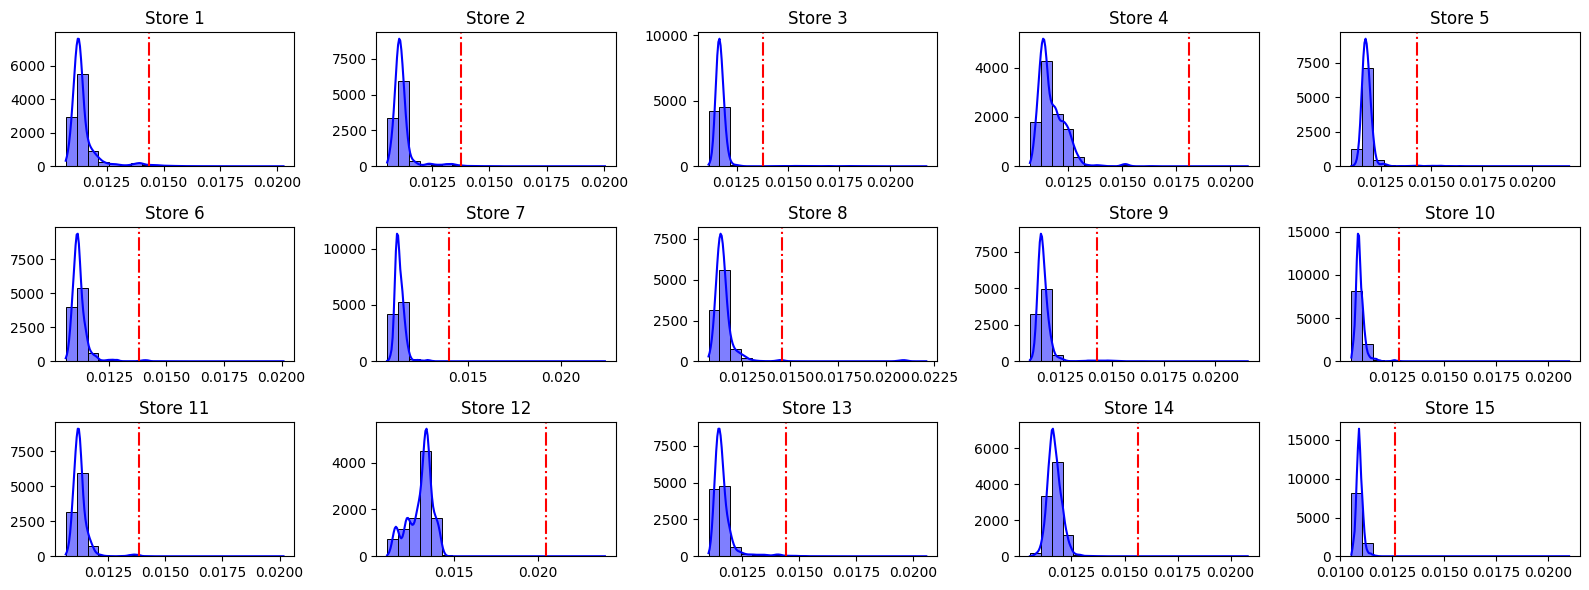

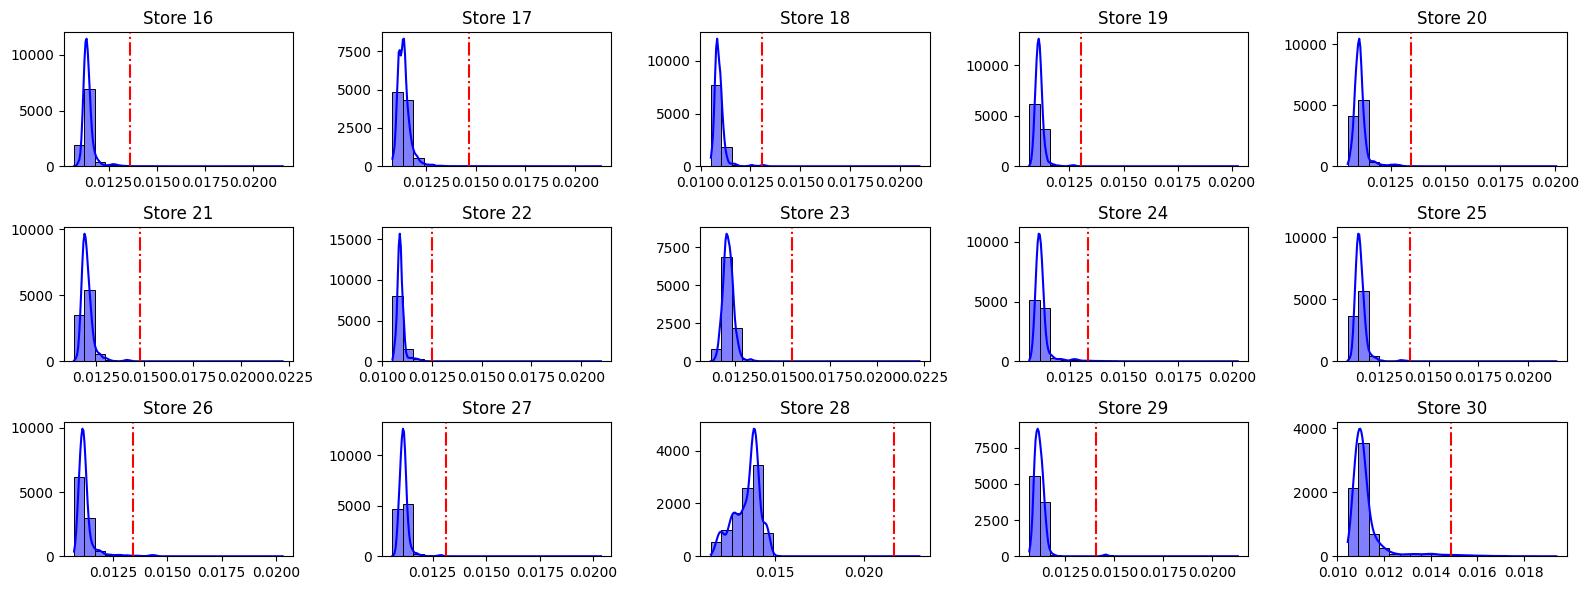

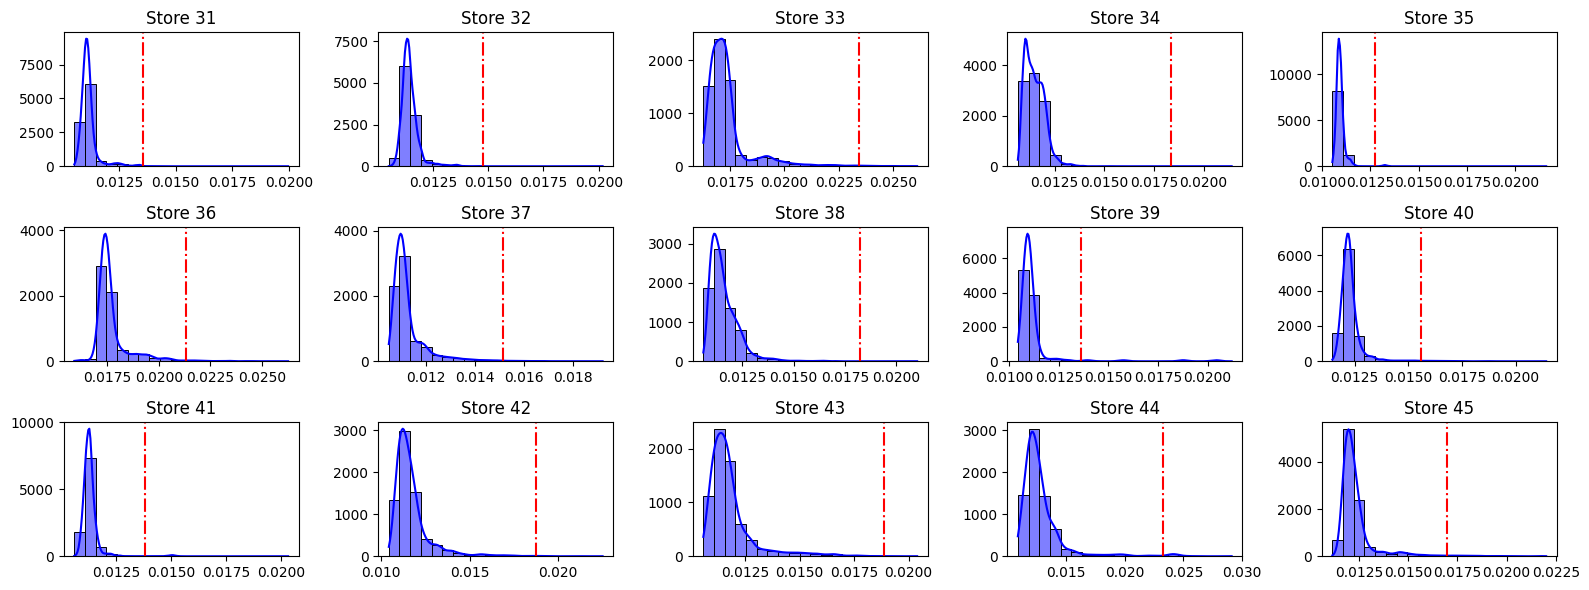

In [193]:
k = 0
for _ in range(3):
    fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize  = (16, 6), dpi = 100)
    for i in range(3):
        for j in range(5):
            threshold = mad(scores[k]['Loss_mse'])
            sns.histplot(scores[k]['Loss_mse'], bins = 20, kde= True, color = 'blue', ax=axes[i][j])
            axes[i][j].axvline(x = threshold, c = "red", linestyle = "dashdot")
            axes[i][j].set_xlabel("")
            axes[i][j].set_ylabel("")
            axes[i][j].set_title(f"Store {k + 1}")
            k += 1
    fig.tight_layout()
    plt.savefig(f"Loss from store {k -14} to store {k}.png")
    plt.show()

In [108]:
# Final a comparisson

In [109]:
total_anomalies

,Loss_mse,Anomaly
Date,,
2010-11-26,0.019394,True
2010-12-24,0.018268,True
2011-11-25,0.018798,True
2011-11-25,0.020270,True
2011-12-23,0.019555,True
...,...,...
2010-07-23,0.019819,True
2010-07-23,0.018696,True
2010-07-23,0.018216,True


In [110]:
len(test_all_anomaly)

45

In [111]:
store_anomalies = pd.concat(test_all_anomaly)
store_anomalies

,Loss_mse,Anomaly
Date,,
2010-02-05,0.015201,True
2010-02-12,0.015569,True
2010-02-19,0.014924,True
2010-03-05,0.014738,True
2010-03-19,0.014376,True
...,...,...
2011-09-09,0.017200,True
2011-09-09,0.017681,True
2011-09-09,0.017752,True


In [112]:
# test_anomalies.index.isin(total_anomalies.index)

In [113]:
total_anomal_data

,Store,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Total_Markdown,1.0,...,93.0,94.0,95.0,96.0,97.0,98.0,99.0,Type_1,Type_2,Type_3
Date,,,,,,,,,,,,,,,,,,,,,
2010-11-26,1,1,0.966318,0.517689,0.158650,0.846945,0.379433,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
2010-12-24,1,0,0.890538,0.300978,0.267050,0.843552,0.379433,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
2011-11-25,1,1,0.915775,0.439822,0.518306,0.913361,0.382116,0.630267,0.744937,0,...,0,0,0,0,0,0,0,0,0,1
2011-11-25,1,1,1.000000,0.439822,0.518306,0.913361,0.382116,0.630267,0.744937,0,...,0,0,0,0,0,0,0,0,0,1
2011-12-23,1,0,0.956641,0.223289,0.429289,0.922159,0.382116,0.630267,0.080744,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-07-23,45,0,0.009147,0.974041,0.052670,0.556367,0.466168,0.451136,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
2010-07-23,45,0,0.011958,0.974041,0.052670,0.556367,0.466168,0.451136,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
2010-07-23,45,0,0.194263,0.974041,0.052670,0.556367,0.466168,0.451136,0.000000,0,...,0,0,0,0,0,0,0,0,1,0


In [204]:
total_anomal_data.to_csv("LSTM_total_anomaly.csv")

In [114]:
test_anomal = pd.concat(test_all_anomal_data)
test_anomal

,Store,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Total_Markdown,1.0,...,93.0,94.0,95.0,96.0,97.0,98.0,99.0,Type_1,Type_2,Type_3
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0.686820,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
2010-02-12,1,1,0.702514,0.055289,0.024408,0.841941,0.405118,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
2010-02-19,1,0,0.663163,0.080533,0.000000,0.842405,0.405118,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
2010-03-05,1,0,0.652748,0.197333,0.079684,0.843008,0.405118,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
2010-03-19,1,0,0.625689,0.340978,0.147882,0.841679,0.405118,0.630267,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-09-09,45,1,0.006857,0.804717,0.760059,0.599095,0.454859,0.451136,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
2011-09-09,45,1,0.016841,0.804717,0.760059,0.599095,0.454859,0.451136,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
2011-09-09,45,1,0.011304,0.804717,0.760059,0.599095,0.454859,0.451136,0.000000,0,...,0,0,0,0,0,0,0,0,1,0


In [206]:
test_anomal.to_csv("LSTM_test_anomaly.csv")

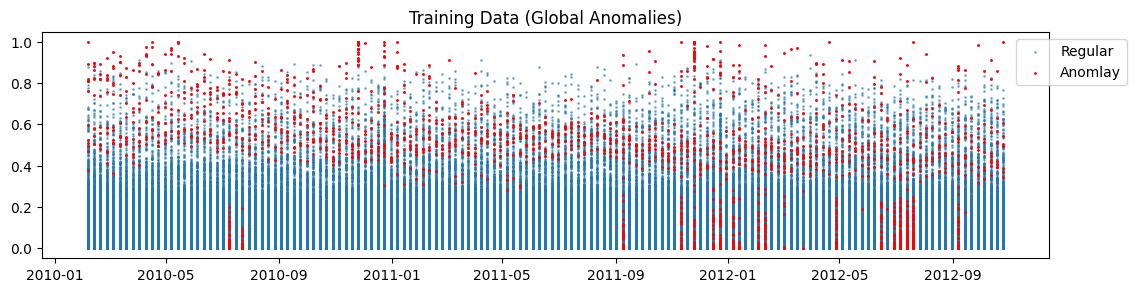

In [124]:
plt.figure(figsize = (13, 3), dpi = 100)
plt.scatter(x = data.index, y = data["Weekly_Sales"], s = 1, alpha = 0.5, label = "Regular")
plt.scatter(x = total_anomal_data.index, y = total_anomal_data["Weekly_Sales"], c = "red", s= 1, label= "Anomlay")
plt.legend(bbox_to_anchor = [.96, 1] )
plt.title("Training Data (Global Anomalies)")
plt.savefig("Trainig.png")

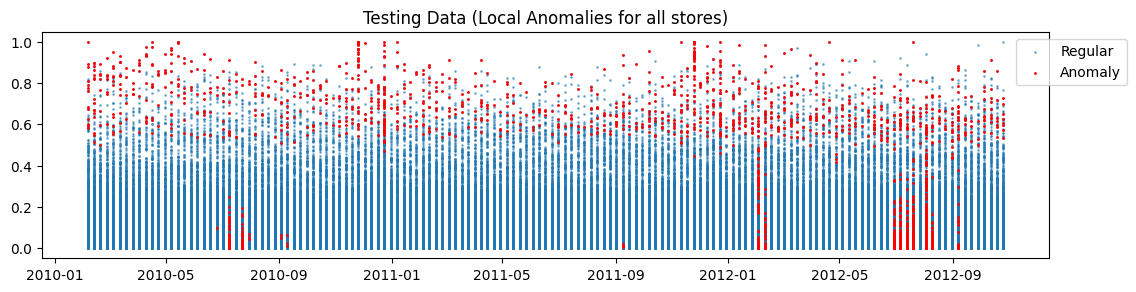

In [125]:
plt.figure(figsize = (13, 3), dpi = 100)
plt.scatter(x = data.index, y = data["Weekly_Sales"], s = 1, alpha = 0.5, label = "Regular")
plt.scatter(x = test_anomal.index, y = test_anomal["Weekly_Sales"], c = "red", s= 1, label = "Anomaly")
plt.legend(bbox_to_anchor = [.96, 1] )
plt.title("Testing Data (Local Anomalies for all stores)")
plt.savefig("Testing.png")

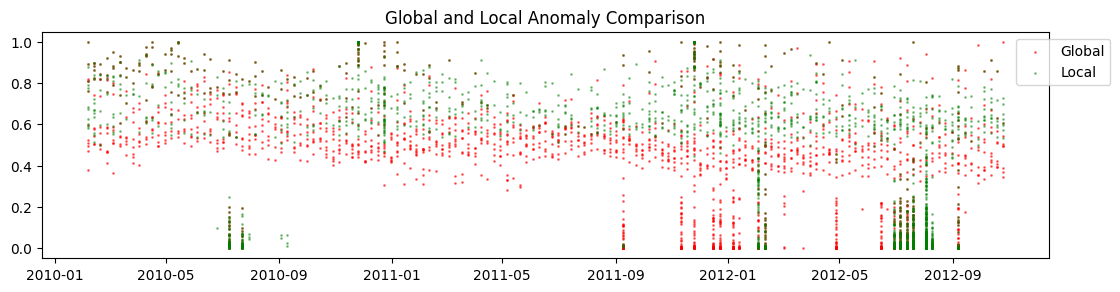

In [147]:
plt.figure(figsize = (13, 3), dpi = 100)
plt.scatter(x = total_anomal_data.index, y = total_anomal_data["Weekly_Sales"], 
            c = "red", s= 1, alpha = 0.5, label = "Global")
plt.scatter(x = test_anomal.index, y = test_anomal["Weekly_Sales"], 
            c = "green", s= 1, alpha = 0.4, label = "Local")
plt.legend(bbox_to_anchor = [.96, 1])
plt.title("Global and Local Anomaly Comparison")
plt.savefig("Global and Local anomaly comparison.png")

Text(0.5, 1.0, 'CPI')

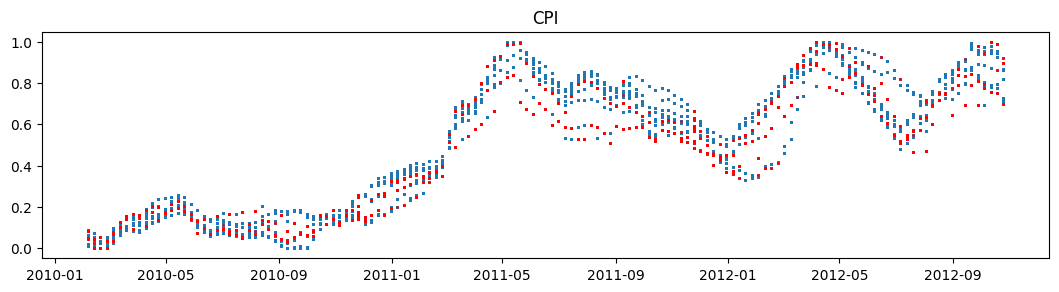

In [200]:
plt.figure(figsize = (13, 3), dpi = 100)
plt.scatter(x = data.index, y = data["Fuel_Price"], s = 1, alpha = 0.5)
plt.scatter(x = total_anomal_data.index, y = total_anomal_data["Fuel_Price"], c = "red", s= 1)
plt.title("CPI")

Text(0.5, 1.0, 'Temperature')

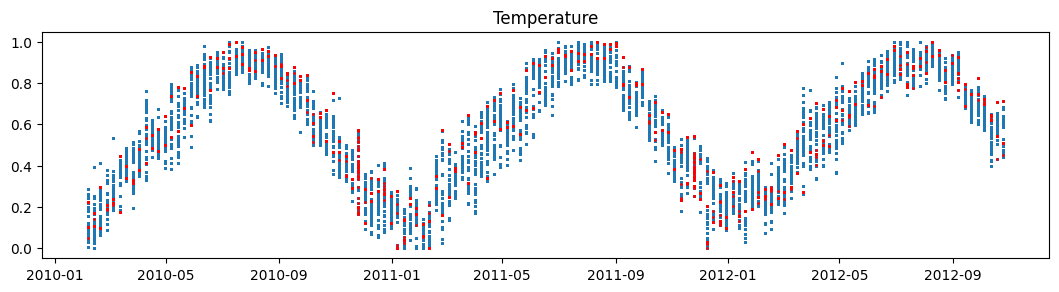

In [199]:
plt.figure(figsize = (13, 3), dpi = 100)
plt.scatter(x = data.index, y = data["Temperature"], s = 1, alpha = 0.5)
plt.scatter(x = total_anomal_data.index, y = total_anomal_data["Temperature"], c = "red", s= 1)
plt.title("Temperature")

Text(0.5, 1.0, 'Total Markdown')

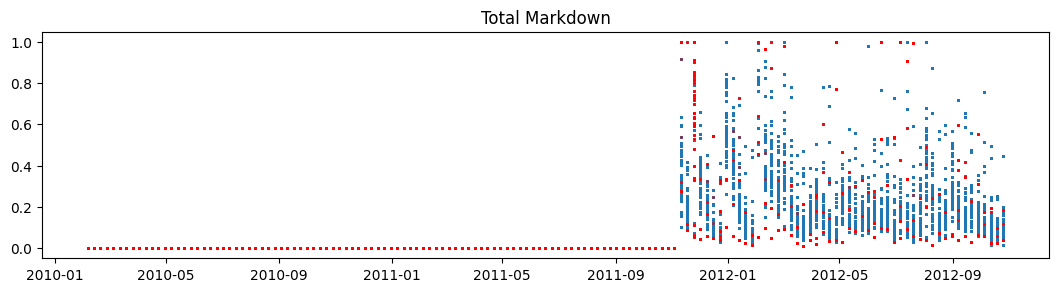

In [201]:
plt.figure(figsize = (13, 3), dpi = 100)
plt.scatter(x = data.index, y = data["Total_Markdown"], s = 1, alpha = 0.5)
plt.scatter(x = total_anomal_data.index, y = total_anomal_data["Total_Markdown"], c = "red", s= 1)
plt.title("Total Markdown")

In [117]:
len(stores_data)

45

In [118]:
len(test_all_anomal_data)

45

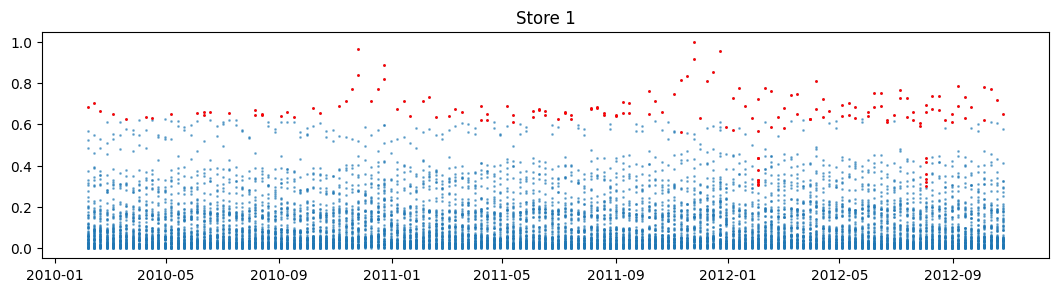

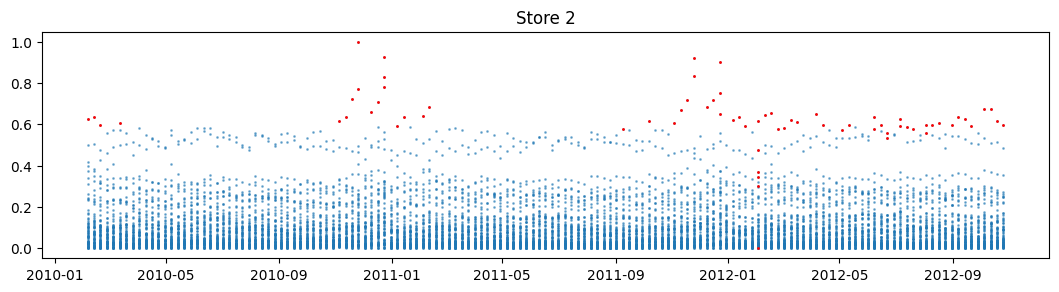

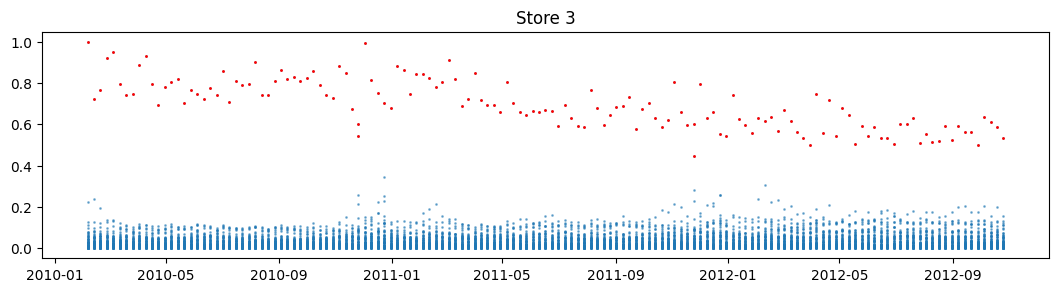

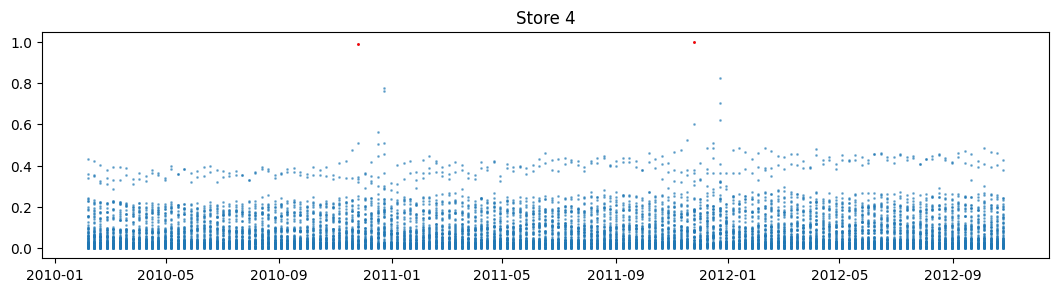

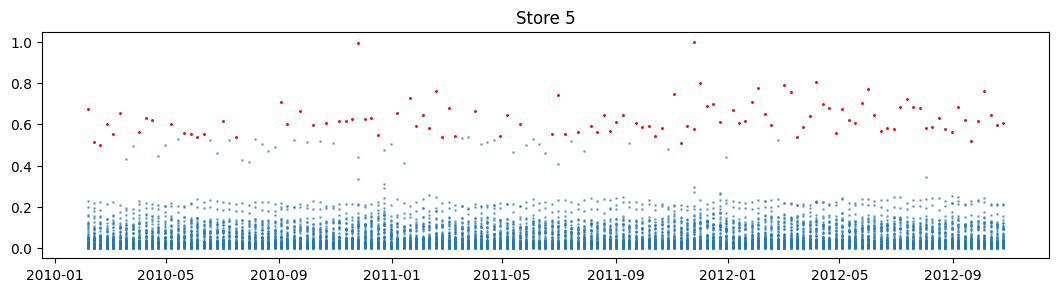

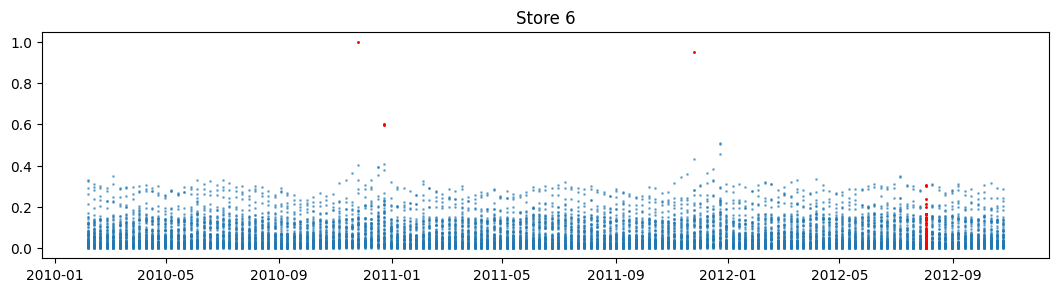

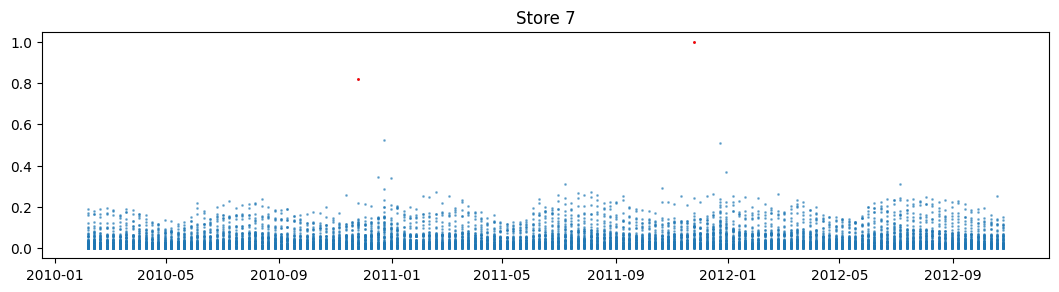

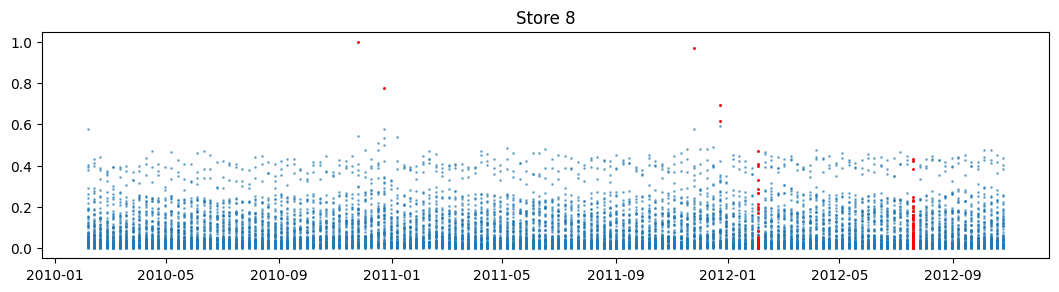

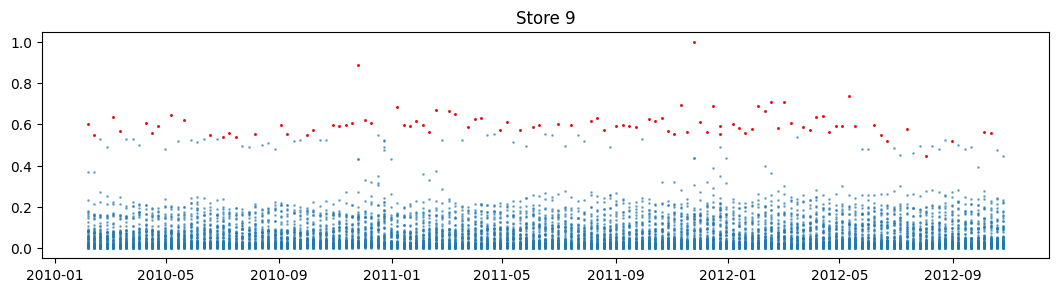

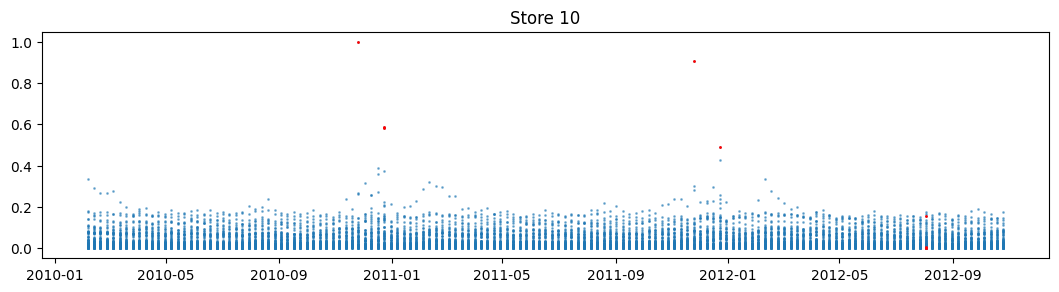

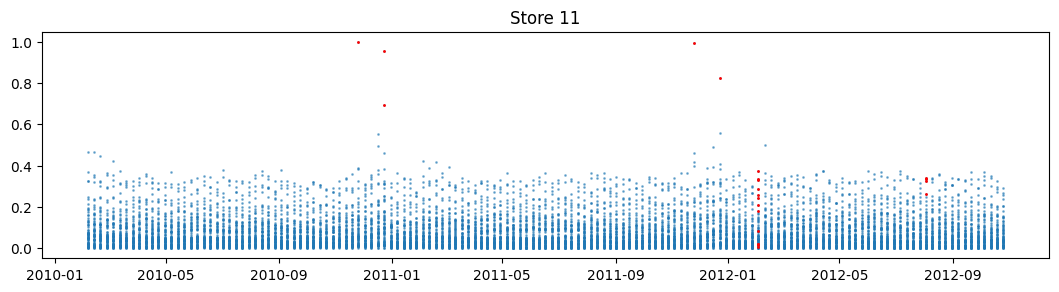

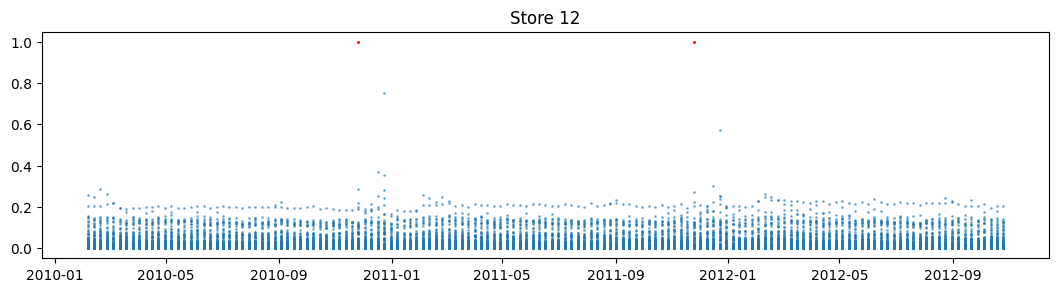

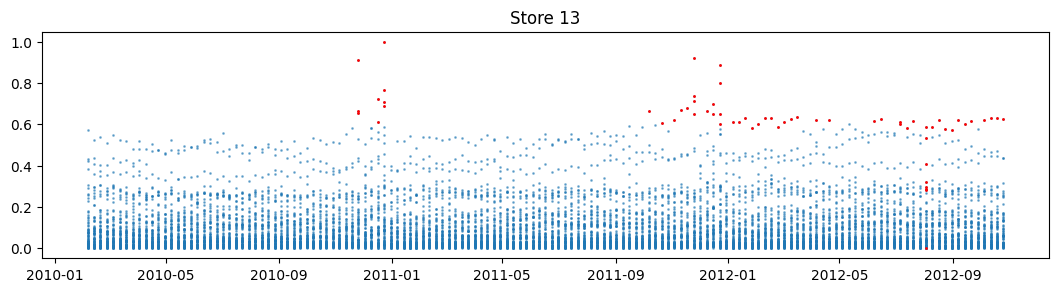

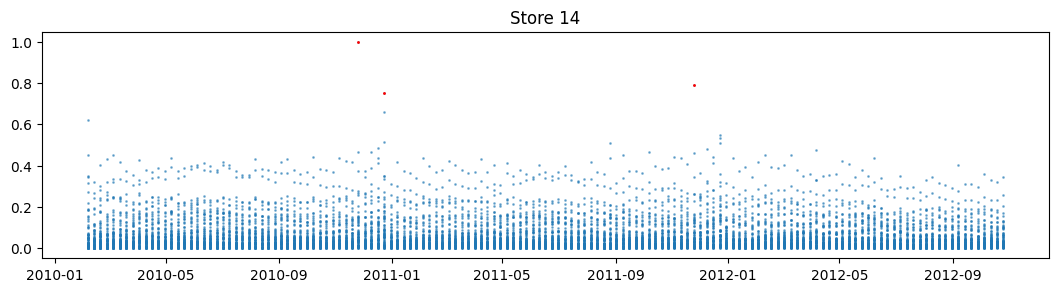

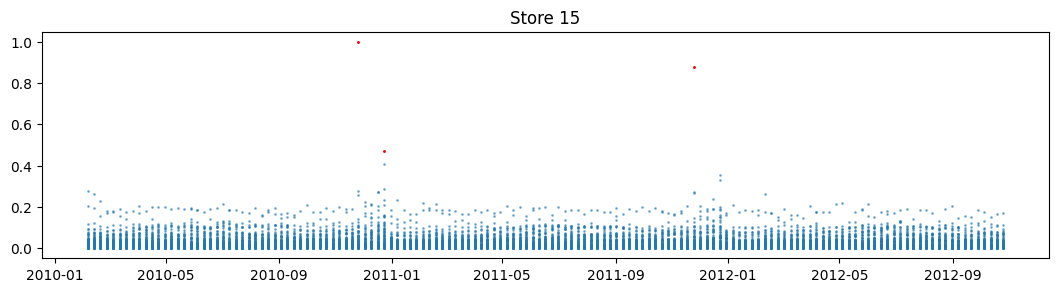

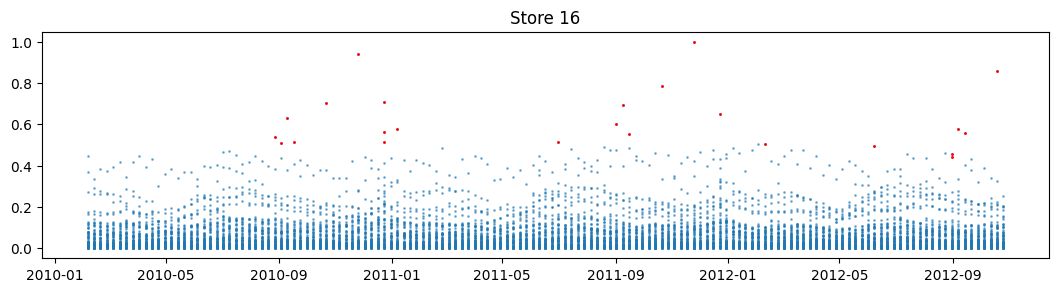

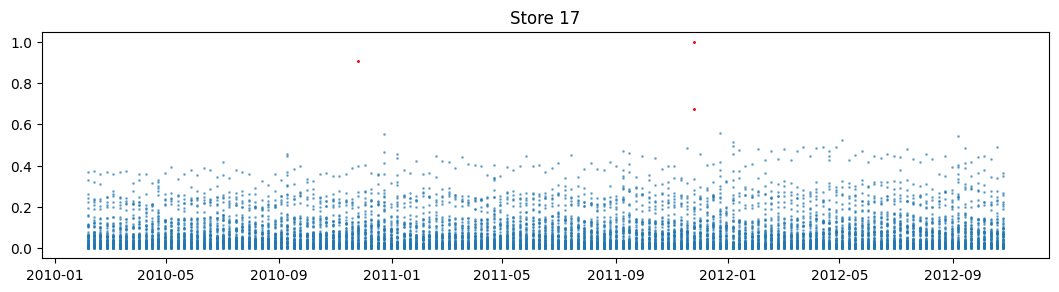

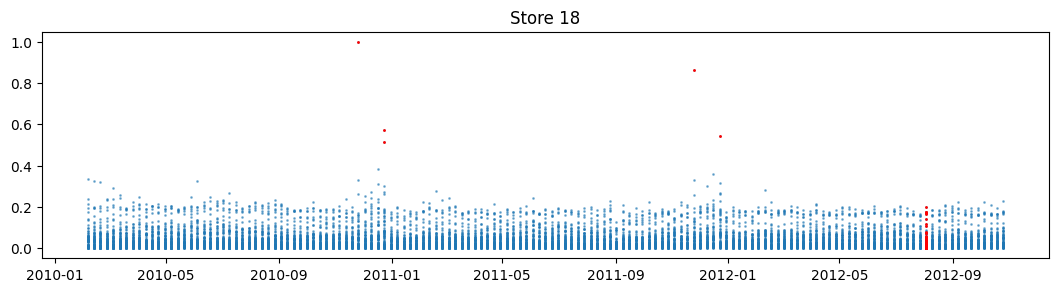

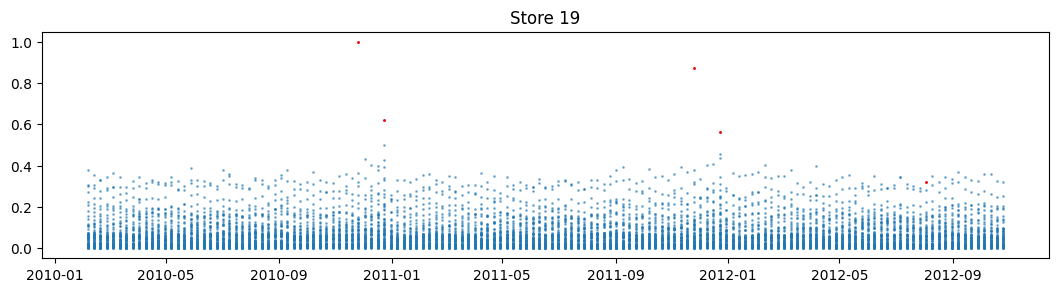

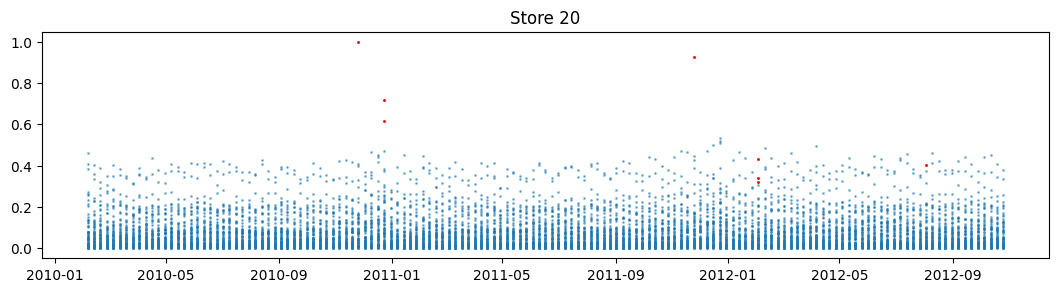

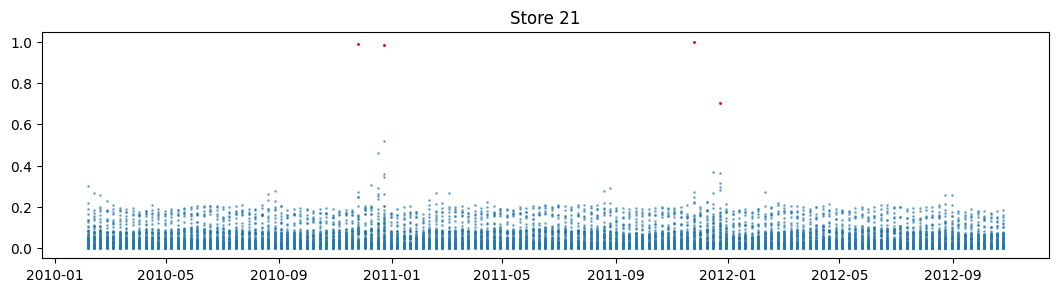

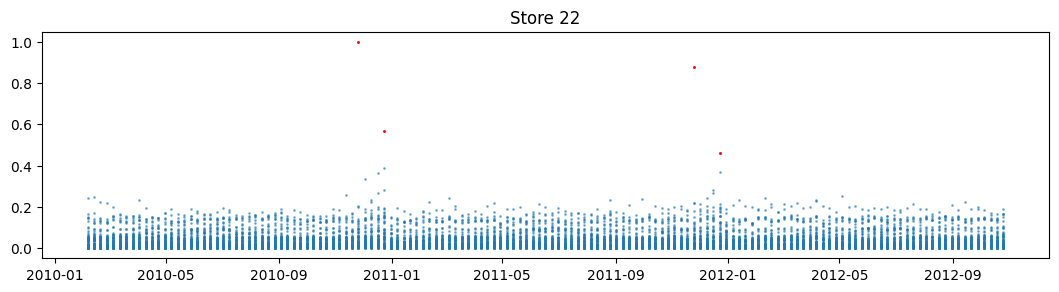

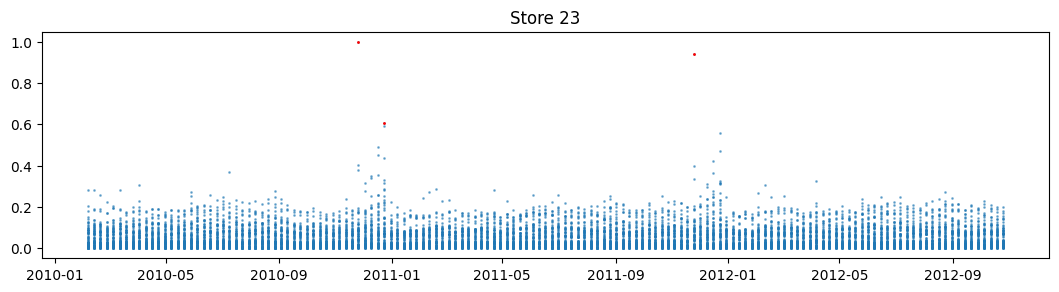

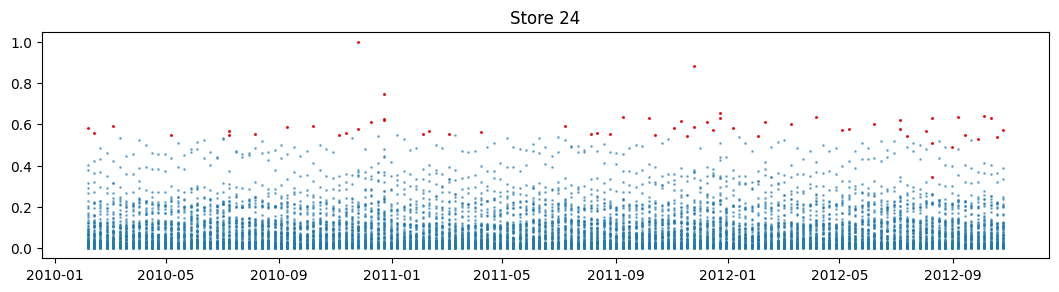

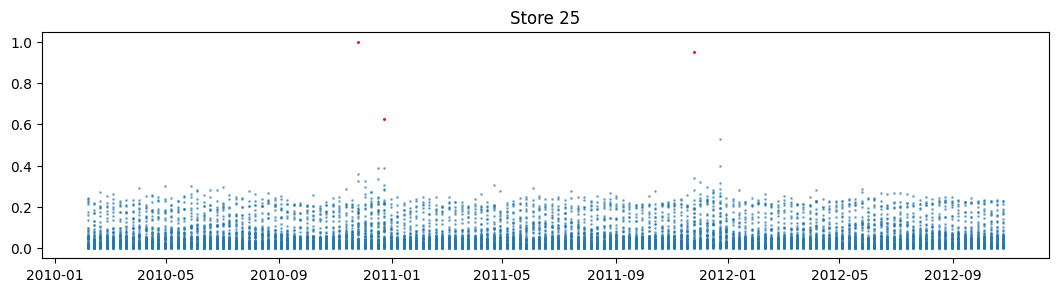

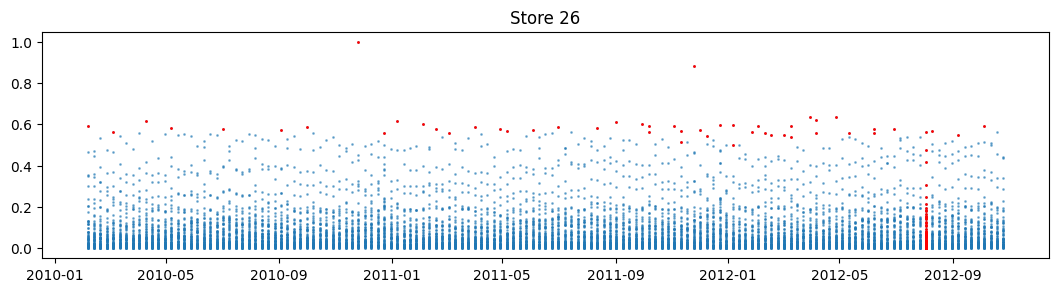

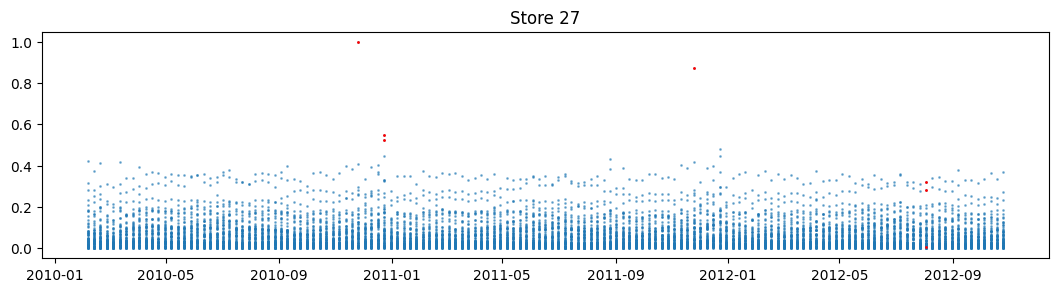

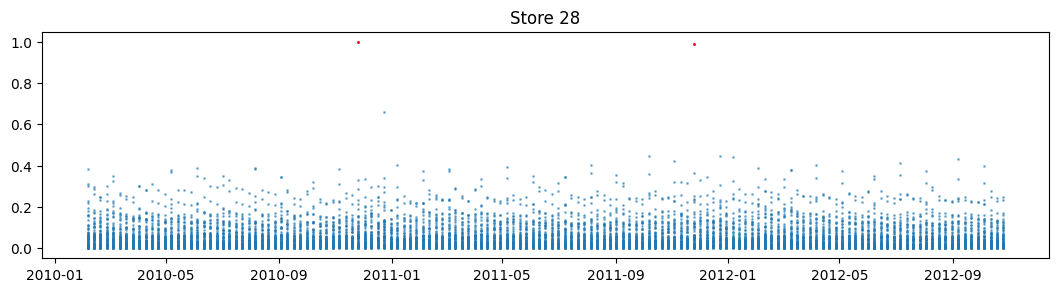

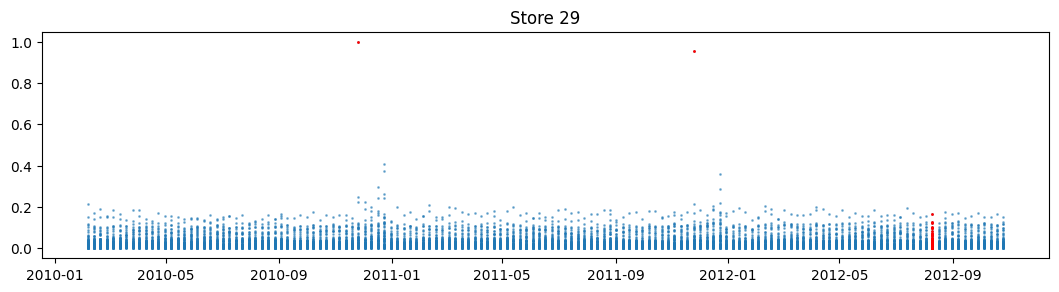

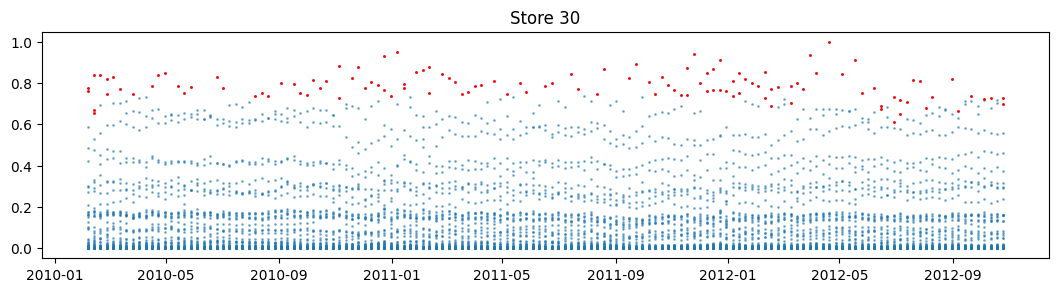

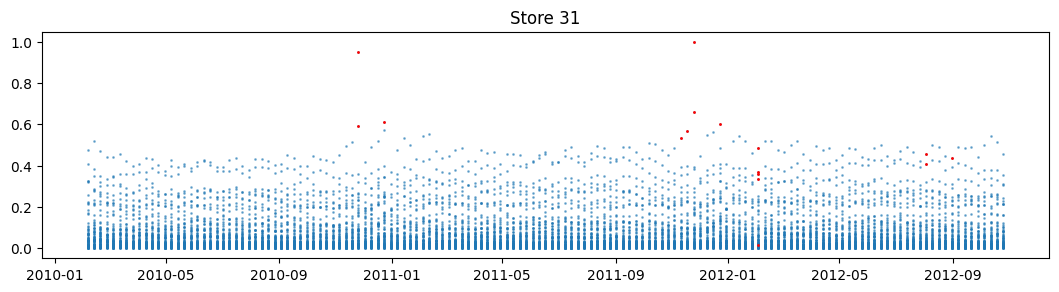

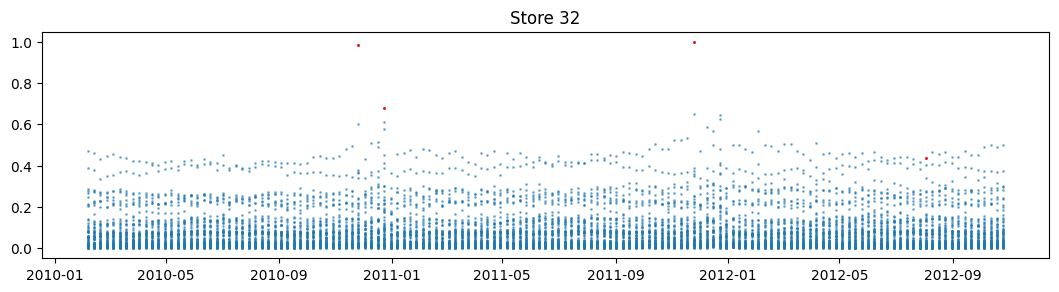

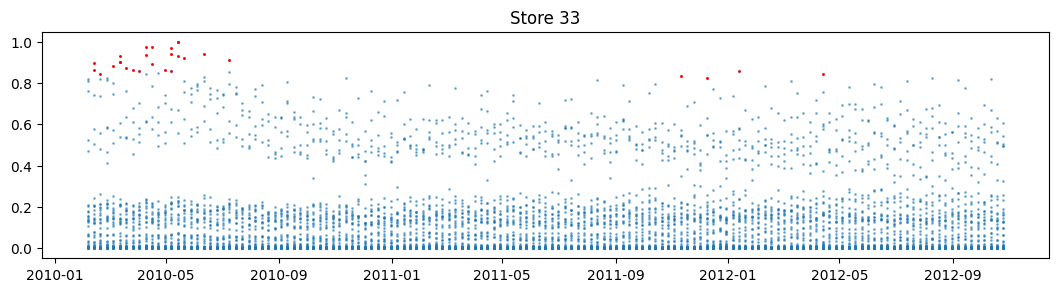

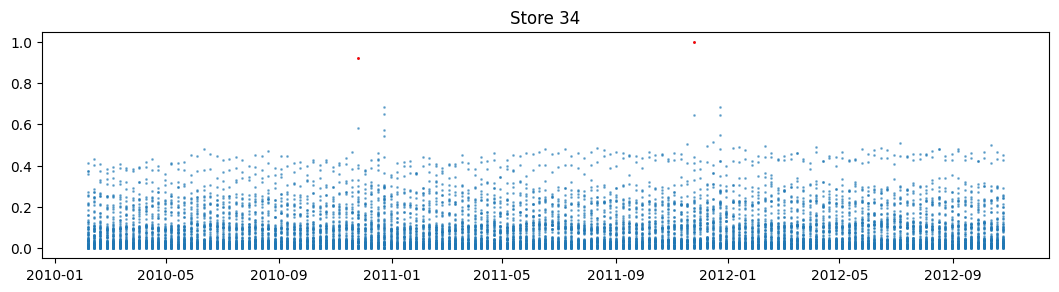

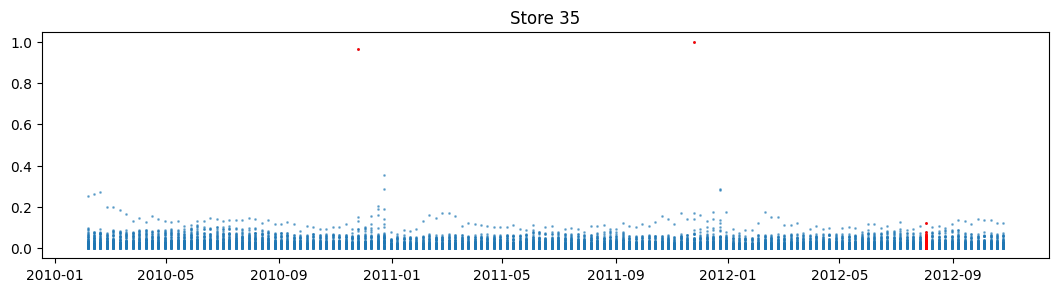

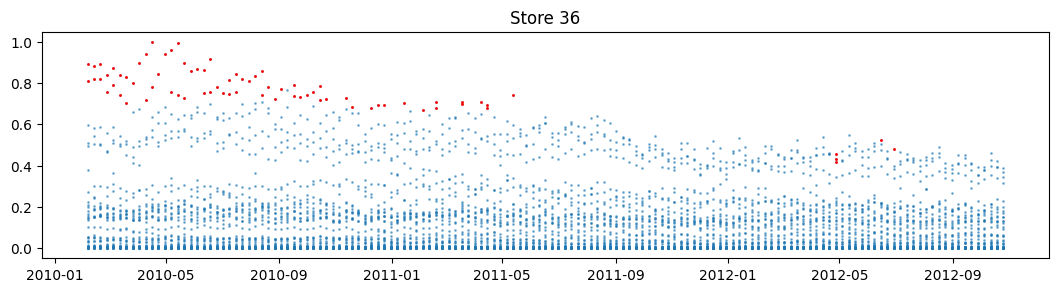

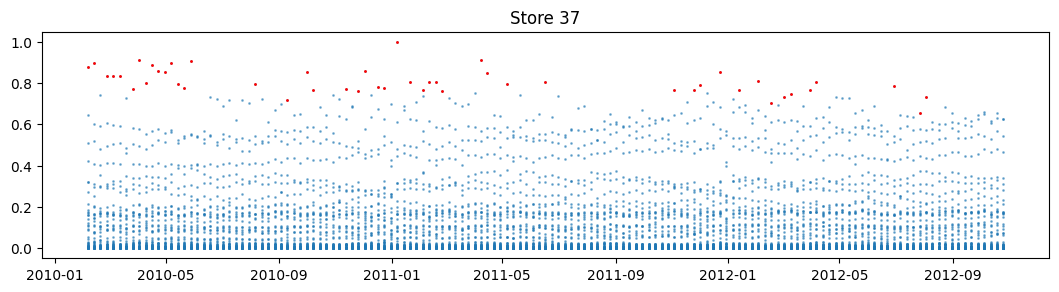

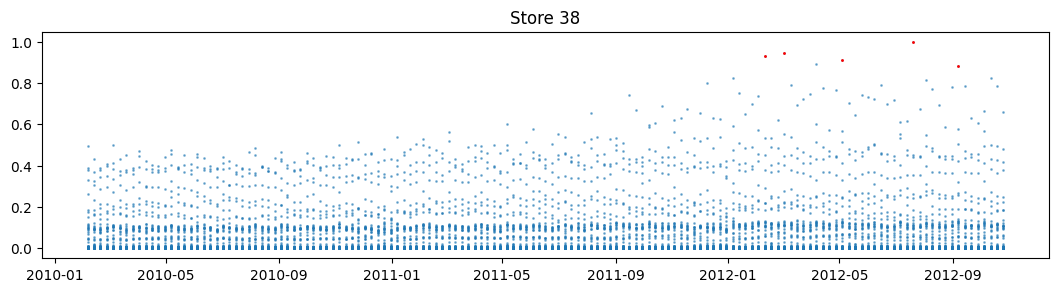

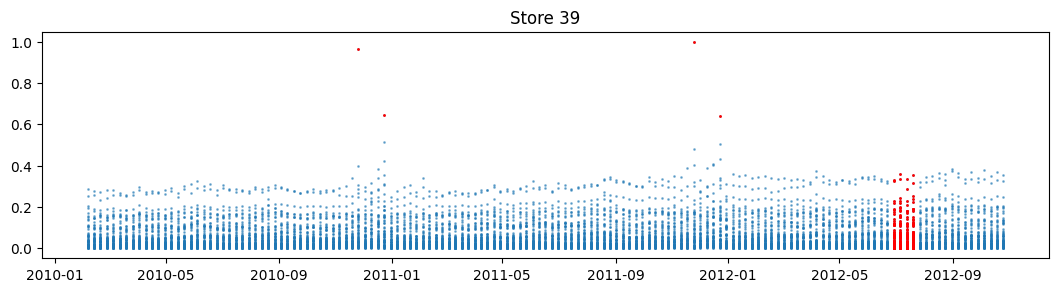

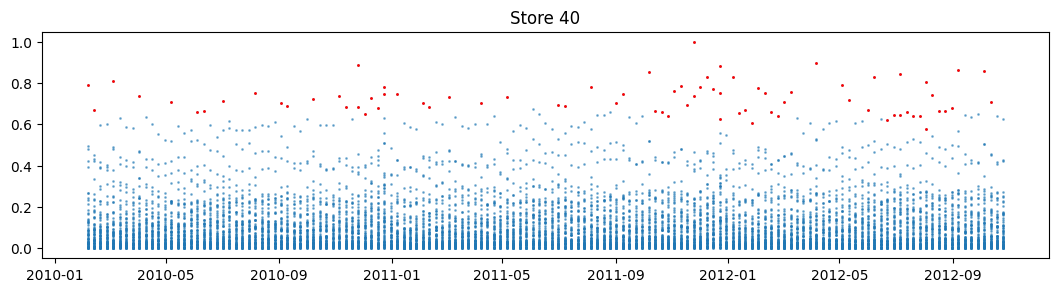

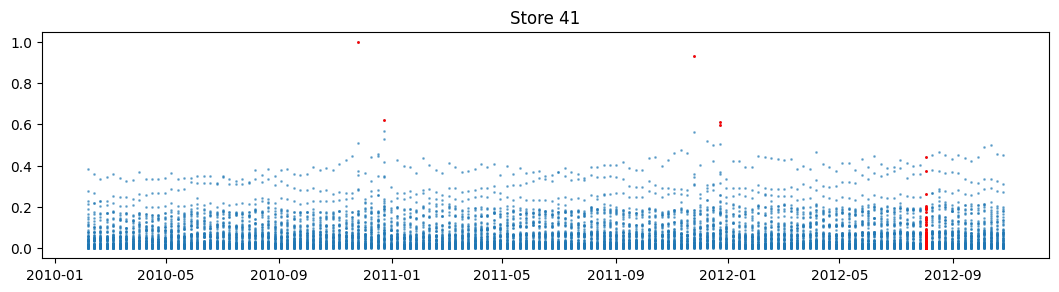

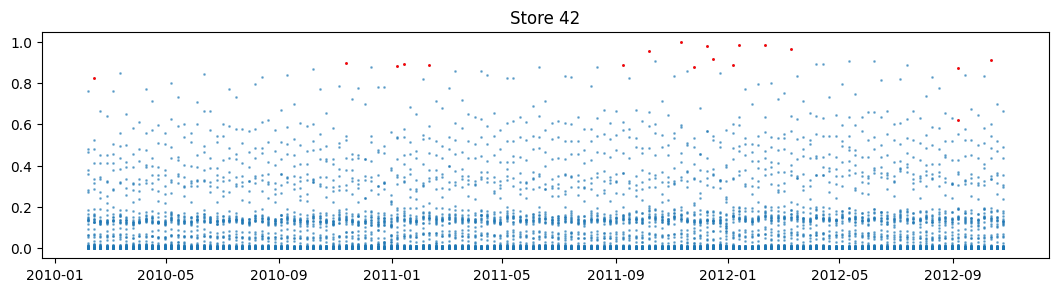

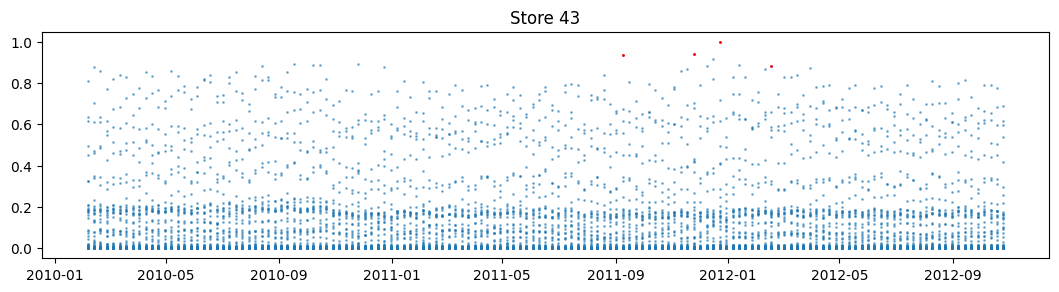

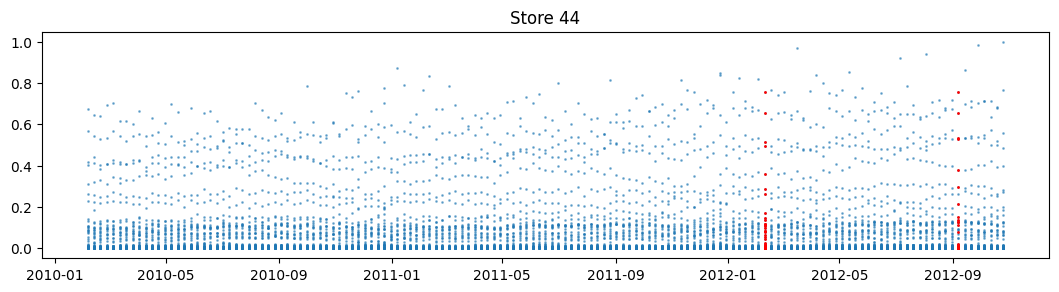

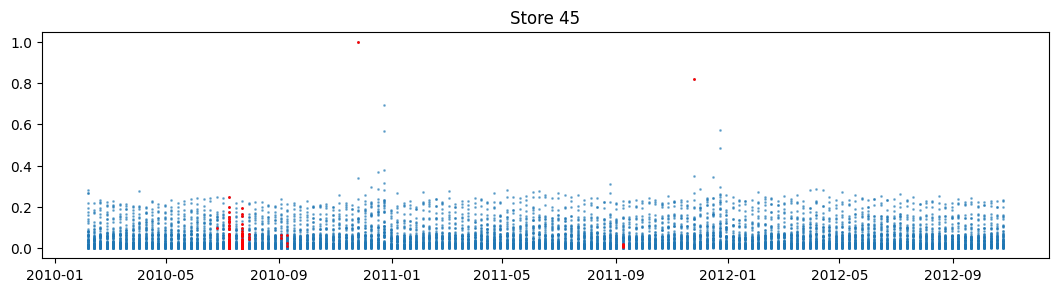

In [132]:
path = "store_pics"
try:
    os.makedirs(path)
except:
    pass

for k in range(len(stores_data)):
    plt.figure(figsize = (13, 3), dpi = 100)
    plt.scatter(x = stores_data[k].index, y = stores_data[k]["Weekly_Sales"], s = 1, alpha = 0.5)
    plt.scatter(x = test_all_anomal_data[k].index, y = test_all_anomal_data[k]["Weekly_Sales"], c = "red", s= 1)
    plt.title(f"Store {k + 1}")
    plt.savefig(f"{path}/store_{k + 1}.png")
    plt.show()